In [92]:
import pandas, seaborn, scipy, numpy, matplotlib, sklearn, collections, itertools, math, functools, sys

import stanity

%matplotlib inline
from matplotlib import pyplot
matplotlib.rc("savefig", dpi=800)
#matplotlib.rc("savefig", dpi=72)

from sklearn import preprocessing

# Constants
library_sizes = {
    'WGS': 3002000000,
    'WES': 50160183,
}
mhc_binding_threshold_affinity = 500

def bootstrap(values, statistic=numpy.mean, samples=5000):
    values = pandas.Series(values).dropna()
    if len(values) <= 1:
        return (numpy.nan, numpy.nan)
    values = [statistic(sklearn.utils.resample(values)) for i in range(samples)]
    return (numpy.percentile(values, 5), numpy.percentile(values, 95))

def round_to_n(x, n):
    return round(x, -int(math.floor(math.log10(x))) + (n - 1)) 

def mean_with_errorbars(values, decimals=0):
    pattern = "%%0.%df" % decimals
    bars = bootstrap(values)
    if numpy.nan in bars:
        return pattern % numpy.mean(values)
    if decimals == 0:
        bars = (round_to_n(bars[0], 2), round_to_n(bars[1], 2)) 
    return (pattern + " (" + pattern + " - " + pattern + ")") % ((numpy.mean(values),) + bars)

pandas.set_option('display.max_columns', 500)


def print_full(x):
    pandas.set_option('display.max_rows', len(x))
    print(x)
    pandas.reset_option('display.max_rows')

In [93]:
df = pandas.read_csv("../data/sources.extended.csv", index_col="source_id")
df = df.ix[~pandas.isnull(df.mutations)]
df

Unnamed: 0     index     donor cohort library treated  \
source_id                                                                     
AOCS-001-1/SP101515            0  SP101515  AOCS-001   AOCS     WGS   False   
AOCS-002-1/SP101517            1  SP101517  AOCS-002   AOCS     WGS   False   
AOCS-004-1/SP101519            2  SP101519  AOCS-004   AOCS     WGS   False   
AOCS-005-1/SP101521            3  SP101521  AOCS-005   AOCS     WGS   False   
AOCS-034-13/SP101524           4  SP101524  AOCS-034   AOCS     WGS    True   
AOCS-034-1/SP101523            5  SP101523  AOCS-034   AOCS     WGS   False   
AOCS-055-1/SP101526            6  SP101526  AOCS-055   AOCS     WGS   False   
AOCS-056-1/SP101528            7  SP101528  AOCS-056   AOCS     WGS   False   
AOCS-057-1/SP101530            8  SP101530  AOCS-057   AOCS     WGS   False   
AOCS-058-1/SP101532            9  SP101532  AOCS-058   AOCS     WGS   False   
AOCS-059-1/SP101536           10  SP101536  AOCS-059   AOCS     WGS   False   
AOCS-060-1/SP101540           11  SP101540  AOCS-060   AOCS     WGS   False   
AOCS-061-1/SP101544           12  SP101544  AOCS-061   AOCS     WGS   False   
AOCS-063-1/SP101548           13  SP101548  AOCS-063   AOCS     WGS   False   
AOCS-064-13/SP101554          14  SP101554  AOCS-064   AOCS     WGS    True   
AOCS-064-1/SP101552           15  SP101552  AOCS-064   AOCS     WGS   False   
AOCS-065-13/SP101560          16  SP101560  AOCS-065   AOCS     WGS    True   
AOCS-065-1/SP101558           17  SP101558  AOCS-065   AOCS     WGS   False   
AOCS-075-1/SP101564           18  SP101564  AOCS-075   AOCS     WGS   False   
AOCS-076-1/SP101568           19  SP101568  AOCS-076   AOCS     WGS   False   
AOCS-077-1/SP101572           20  SP101572  AOCS-077   AOCS     WGS    True   
AOCS-078-1/SP101576           21  SP101576  AOCS-078   AOCS     WGS   False   
AOCS-079-1/SP101580           22  SP101580  AOCS-079   AOCS     WGS   False   
AOCS-080-1/SP101584           23  SP101584  AOCS-080   AOCS     WGS   False   
AOCS-081-1/SP101588           24  SP101588  AOCS-081   AOCS     WGS   False   
AOCS-083-1/SP101592           25  SP101592  AOCS-083   AOCS     WGS   False   
AOCS-084-1/SP101596           26  SP101596  AOCS-084   AOCS     WGS   False   
AOCS-085-1/SP101600           27  SP101600  AOCS-085   AOCS     WGS   False   
AOCS-086-1/SP101604           28  SP101604  AOCS-086   AOCS     WGS   False   
AOCS-086-13/SP101606          29  SP101606  AOCS-086   AOCS     WGS    True   
...                          ...       ...       ...    ...     ...     ...   
AOCS-144-1/SP101951           85  SP101951  AOCS-144   AOCS     WGS   False   
AOCS-145-1/SP101961           86  SP101961  AOCS-145   AOCS     WGS   False   
AOCS-146-1/SP101971           87  SP101971  AOCS-146   AOCS     WGS   False   
AOCS-147-1/SP101981           88  SP101981  AOCS-147   AOCS     WGS   False   
AOCS-148-1/SP101990           89  SP101990  AOCS-148   AOCS     WGS   False   
AOCS-149-1/SP102000           90  SP102000  AOCS-149   AOCS     WGS   False   
AOCS-150-13/SP102010          91  SP102010  AOCS-150   AOCS     WGS    True   
AOCS-150-14/SP102015          92  SP102015  AOCS-150   AOCS     WGS    True   
AOCS-152-1/SP102025           93  SP102025  AOCS-152   AOCS     WGS   False   
AOCS-153-1/SP102035           94  SP102035  AOCS-153   AOCS     WGS   False   
AOCS-155-13/SP102045          95  SP102045  AOCS-155   AOCS     WGS    True   
AOCS-157-1/SP102055           96  SP102055  AOCS-157   AOCS     WGS   False   
AOCS-158-1/SP102064           97  SP102064  AOCS-158   AOCS     WGS    True   
AOCS-159-1/SP102074           98  SP102074  AOCS-159   AOCS     WGS   False   
AOCS-160-1/SP102084           99  SP102084  AOCS-160   AOCS     WGS   False   
AOCS-161-1/SP102090          100  SP102090  AOCS-161   AOCS     WGS   False   
AOCS-162-1/SP102096          101  SP102096  AOCS-162   AOCS     WGS    True   
AOCS-163-1/SP102103          102  SP102103  AOCS-163   AOCS     WGS   Fa

In [94]:
#seaborn.lmplot(data=df, x="percentage_cellularity", y="mutations", hue="tissue_type")

In [95]:
predicted = ["mutations", "peptides", "expressed peptides"]

# donor is handled specially
predictors = [
    "treated",
#    "timepoint",
#    "metastasis",
#    "specimen_interval",
    "tissue_type",
#    "tumour_grade",
#    "tumour_stage",
    "percentage_cellularity"
]

In [96]:
def make_data(y_column):
    stan_df = df[[y_column, "donor"] + predictors].copy()
    stan_df.columns = ["y"] + list(stan_df.columns[1:])
    stan_df["y"] = numpy.log(stan_df["y"])
    original_donors = stan_df.donor
    stan_df["low_cellularity"] = stan_df.percentage_cellularity < stan_df.dropna().percentage_cellularity.quantile(.25)
    del stan_df["percentage_cellularity"]
    stan_df["solid"] = stan_df["tissue_type"] == "solid"
    del stan_df["tissue_type"]
    stan_df["num_sources_for_donor"] = pandas.Series(
        [(original_donors == donor).sum() for donor in original_donors],
        index=original_donors.index)

    stan_df = stan_df.dropna()
    stan_df["donor"] = stan_df.donor.astype('category').values.codes
    stan_df["solid and treated"] = (stan_df.solid) & (stan_df.treated)
    return stan_df

data_by_predicted = collections.OrderedDict()
for col in predicted:
    data_by_predicted[col] = make_data(col)
    print(col, data_by_predicted[col].shape)
data_by_predicted["mutations"]  

('mutations', (115, 7))
('peptides', (115, 7))
('expressed peptides', (98, 7))


y  donor treated low_cellularity  solid  \
source_id                                                               
AOCS-001-1/SP101515    8.688959      0   False            True   True   
AOCS-002-1/SP101517    7.334329      1   False           False   True   
AOCS-004-1/SP101519    8.822617      2   False            True   True   
AOCS-005-1/SP101521    8.648748      3   False           False   True   
AOCS-034-13/SP101524   9.519735      4    True           False  False   
AOCS-034-1/SP101523    8.841159      4   False           False   True   
AOCS-055-1/SP101526    9.623244      5   False           False   True   
AOCS-056-1/SP101528    8.868132      6   False           False   True   
AOCS-057-1/SP101530    8.732466      7   False            True   True   
AOCS-058-1/SP101532    9.126850      8   False           False   True   
AOCS-059-1/SP101536    8.237215      9   False            True   True   
AOCS-060-1/SP101540    8.420682     10   False           False   True   
AOCS-061-1/SP101544    8.731821     11   False           False   True   
AOCS-063-1/SP101548    8.801469     12   False            True   True   
AOCS-064-13/SP101554  10.076306     13    True           False  False   
AOCS-064-1/SP101552    9.731572     13   False           False   True   
AOCS-065-13/SP101560   8.912339     14    True           False  False   
AOCS-065-1/SP101558    8.704668     14   False           False   True   
AOCS-075-1/SP101564    8.507749     15   False           False   True   
AOCS-076-1/SP101568    8.745284     16   False            True   True   
AOCS-077-1/SP101572    8.033983     17    True            True   True   
AOCS-078-1/SP101576    9.107421     18   False           False   True   
AOCS-079-1/SP101580    8.851377     19   False            True   True   
AOCS-080-1/SP101584    8.854665     20   False           False   True   
AOCS-081-1/SP101588    8.820256     21   False           False   True   
AOCS-083-1/SP101592    8.795431     22   False           False   True   
AOCS-084-1/SP101596    8.538955     23   False           False   True   
AOCS-085-1/SP101600    7.681099     24   False            True   True   
AOCS-086-1/SP101604    8.751633     25   False            True   True   
AOCS-086-13/SP101606   9.581697     25    True           False  False   
...                         ...    ...     ...             ...    ...   
AOCS-144-1/SP101951    8.654343     68   False           False   True   
AOCS-145-1/SP101961    9.220291     69   False           False   True   
AOCS-146-1/SP101971    8.871365     70   False           False   True   
AOCS-147-1/SP101981    9.559940     71   False            True   True   
AOCS-148-1/SP101990    8.831566     72   False           False   True   
AOCS-149-1/SP102000    9.430199     73   False           False   True   
AOCS-150-13/SP102010   9.499571     74    True           False  False   
AOCS-150-14/SP102015   9.517384     74    True            True  False   
AOCS-152-1/SP102025    9.121400     75   False           False   True   
AOCS-153-1/SP102035    8.896862     76   False           False   True   
AOCS-155-13/SP102045   9.885273     77    True           False  False   
AOCS-157-1/SP102055    8.014005     78   False           False   True   
AOCS-158-1/SP102064    8.860641     79    True           False   True   
AOCS-159-1/SP102074    8.489616     80   False           False   True   
AOCS-160-1/SP102084    8.827615     81   False           False   True   
AOCS-161-1/SP102090    8.818926     82   False           False   True   
AOCS-162-1/SP102096    8.564458     83    True           False   True   
AOCS-163-1/SP102103    8.596559     84   False           False   True   
AOCS-164-1/SP102113    8.780326     85   False           False   True   
AOCS-165-1/SP102123    8.749891     86   False           False   True   
AOCS-166-1/SP102133   10.579616     87   False           False   True   
AOCS-167-13/SP102143   9.082166     88    True           False  False   
AOCS-167-4/SP10

In [97]:
# stan model
model1 = """
data {
    // Data sizes
    int<lower=0> num_sources;
    int<lower=0> num_predictors;
    int<lower=0> num_donors;

    // Data
    vector[num_predictors] predictors[num_sources];
    int<lower=0> donors[num_sources];
    real y[num_sources];  // predicted variable
    int<lower=1> num_sources_for_donor[num_sources];
}
parameters {
    real global_mean;
    real<lower=0> donor_sigma;
    real<lower=0> sample_sigma;
    vector[num_donors] donor_mean;    
    vector[num_predictors] predictor_coefficients;
}
transformed parameters {
    real lp;
    real mu[num_sources];
    
    for (i in 1:num_sources) {
        lp <- dot_product(predictors[i], predictor_coefficients);
        if (num_sources_for_donor[i] > 1) {
            mu[i] <- donor_mean[donors[i]] + lp;
        } else {
            mu[i] <- global_mean + lp;
        }
    }
}
model {
    global_mean ~ normal(0, 100);
    donor_sigma ~ cauchy(0, 2);
    sample_sigma ~ cauchy(0, 2);
    donor_mean ~ normal(global_mean, donor_sigma);
    predictor_coefficients ~ normal(0, 20);
    y ~ normal(mu, sample_sigma);    
}
generated quantities {
    real y_rep[num_sources];
    real log_lik[num_sources];
    
    for (i in 1:num_sources) {
        // not sure if these are vectorized
        y_rep[i] <- normal_rng(mu[i], sample_sigma);
        log_lik[i] <- normal_log(y[i], mu[i], sample_sigma);
    }
}
""".strip()

data = {    

}
def init(data):
    return {
        'global_mean': 0.0,
        'donor_sigma': 1.0,
        'sample_sigma': 1.0,
        'donor_mean': numpy.zeros(data['num_donors']),
        'predictor_coefficients': numpy.random.normal(0, .1, size=(data['num_predictors'],)),
    }

for (i, line) in enumerate(model1.split("\n")):
    print("%3d %s" % (i + 1, line))

def print_dict(d):
    for key in [key for key in d if not isinstance(d[key], numpy.ndarray)]:
        print("%s: %s" % (key, d[key]))
    for key in [key for key in d if isinstance(d[key], numpy.ndarray)]:
        print("%s: %s mean=%s std=%s" % (key,  d[key].shape, d[key].mean(), d[key].std()))

fit_results = {}
for (y_label, raw_data) in data_by_predicted.items():
    print("+" * 40)
    print("RUNNING MODEL FOR: %s" % y_label)
    df_x = raw_data[[x for x in list(raw_data.columns) if x not in ("y", "donor")]].astype(float)
    data = {
        'num_sources': len(raw_data.index),
        'num_predictors': len(df_x.columns),
        'num_donors': raw_data.donor.nunique(),

        'predictors': df_x.values.astype(float),
        'donors': raw_data.donor.values + 1,  # convert to 1-indexed
        'num_sources_for_donor': raw_data.num_sources_for_donor.values,
        'y': raw_data.y.values,
    }
    print("")
    print("*" * 40)
    print("DATA")
    print_dict(data)
    print("")

    print("*" * 40)
    print("INITIAL VALUES")
    print_dict(init(data))
    sys.stdout.flush()
    
    fit_results[y_label] = stanity.fit(model_code=model1, data=data, init=lambda: init(data), iter=10000, chains=2)
    print("Done with fit.")
print("DONE")


  1 data {
  2     // Data sizes
  3     int<lower=0> num_sources;
  4     int<lower=0> num_predictors;
  5     int<lower=0> num_donors;
  6 
  7     // Data
  8     vector[num_predictors] predictors[num_sources];
  9     int<lower=0> donors[num_sources];
 10     real y[num_sources];  // predicted variable
 11     int<lower=1> num_sources_for_donor[num_sources];
 12 }
 13 parameters {
 14     real global_mean;
 15     real<lower=0> donor_sigma;
 16     real<lower=0> sample_sigma;
 17     vector[num_donors] donor_mean;    
 18     vector[num_predictors] predictor_coefficients;
 19 }
 20 transformed parameters {
 21     real lp;
 22     real mu[num_sources];
 23     
 24     for (i in 1:num_sources) {
 25         lp <- dot_product(predictors[i], predictor_coefficients);
 26         if (num_sources_for_donor[i] > 1) {
 27             mu[i] <- donor_mean[donors[i]] + lp;
 28         } else {
 29             mu[i] <- global_mean + lp;
 30         }
 31     }
 32 }
 33 model {
 34     global

In [98]:
all_fit_coefficients = []
for (y_label, fit) in fit_results.items():
    extracted = fit.extract()
    fit_coefficients = pandas.DataFrame(numpy.exp(extracted['predictor_coefficients']),
                           columns=list(data_by_predicted[y_label].columns)[2:])
    fit_coefficients["y_label"] = y_label
    all_fit_coefficients.append(fit_coefficients)
all_fit_coefficients = pandas.concat(all_fit_coefficients, ignore_index=True)
all_fit_coefficients

treated  low_cellularity     solid  num_sources_for_donor  \
0      1.540371         0.797153  0.848616               1.296150   
1      1.568034         0.621434  0.706284               1.454188   
2      0.912892         1.121150  0.583969               1.473010   
3      1.556611         0.812403  0.870165               1.297068   
4      2.098665         0.935347  1.264869               1.295582   
5      1.514498         0.997377  0.909098               1.448982   
6      1.479239         1.133508  0.747144               1.090000   
7      1.046571         0.898106  0.638363               1.220986   
8      1.681844         1.150838  1.082626               1.478957   
9      1.292117         1.008543  0.802180               1.532437   
10     1.777614         1.038441  1.249339               1.682692   
11     1.172070         0.853442  0.654768               1.385104   
12     2.809976         1.131988  1.591371               1.328097   
13     1.722690         1.043422  0.974419               1.413788   
14     1.143447         0.903855  0.509046               1.070900   
15     1.673963         0.951698  1.099499               1.527519   
16     2.535151         0.993755  1.493743               1.528032   
17     1.620607         0.827868  0.853402               1.558636   
18     1.666755         1.020511  1.052880               1.650011   
19     1.982655         0.931313  1.550139               1.609134   
20     0.720344         1.208797  0.564372               1.528585   
21     3.349497         0.815951  1.590608               1.562215   
22     2.267814         1.006554  1.260185               1.523811   
23     1.631009         0.887162  1.238743               1.376514   
24     1.169961         1.058959  0.565776               1.249943   
25     1.137744         1.016365  0.516258               1.303803   
26     2.523010         1.044484  1.394025               1.465387   
27     1.082907         1.109701  0.553193               1.257479   
28     1.325886         1.174765  0.774580               1.550095   
29     0.764195         1.053637  0.481504               1.283141   
...         ...              ...       ...                    ...   
29970  1.155042         0.941940  0.712613               1.492858   
29971  1.093000         1.149628  0.339469               1.266934   
29972  1.558991         1.070777  0.850457               1.459222   
29973  2.461439         0.935632  1.468069               1.408223   
29974  2.668930         1.275540  1.228819               1.696608   
29975  1.728348         0.688910  0.948128               1.425752   
29976  1.542734         1.028266  0.671750               1.466272   
29977  2.980651         0.888425  1.188233               1.264274   
29978  3.097386         0.947189  1.519126               1.732707   
29979  1.892066         1.619985  0.961961               1.279686   
29980  1.039441         1.097118  0.636370               1.456339   
29981  1.714923         0.979871  0.709799               1.352069   
29982  1.546950         0.716384  0.747200               1.374815   
29983  2.837804         1.002006  1.257280               1.323513   
29984  2.959081         1.353987  1.841955               1.382650   
29985  2.539781         1.340162  1.044462               1.405144   
29986  1.742313         1.261579  0.630311               1.229915   
29987  2.220218         1.337497  1.090205               1.495675   
29988  1.733271         0.770453  0.757852               1.321863   
29989  1.484189         1.134296  0.649581               1.373985   
29990  2.107306         0.880230  0.937876               1.519336   
29991  2.308605         0.895081  0.980199               1.599626   
29992  2.306142         1.054804  0.994980               1.773027   
29993  2.043918         1.242348  0.992386               1.313286   
29994  1.374560         1.186240  0.642310               1.334844   
29995  1.110529         0.888041  0.369463               1.198925   
29996 

#### plot coefficient values by outcome type

In [99]:
melted = pandas.melt(all_fit_coefficients, id_vars=["y_label"])

In [100]:
1 - (all_fit_coefficients.treated <= 1.05).mean()

0.91923333333333335

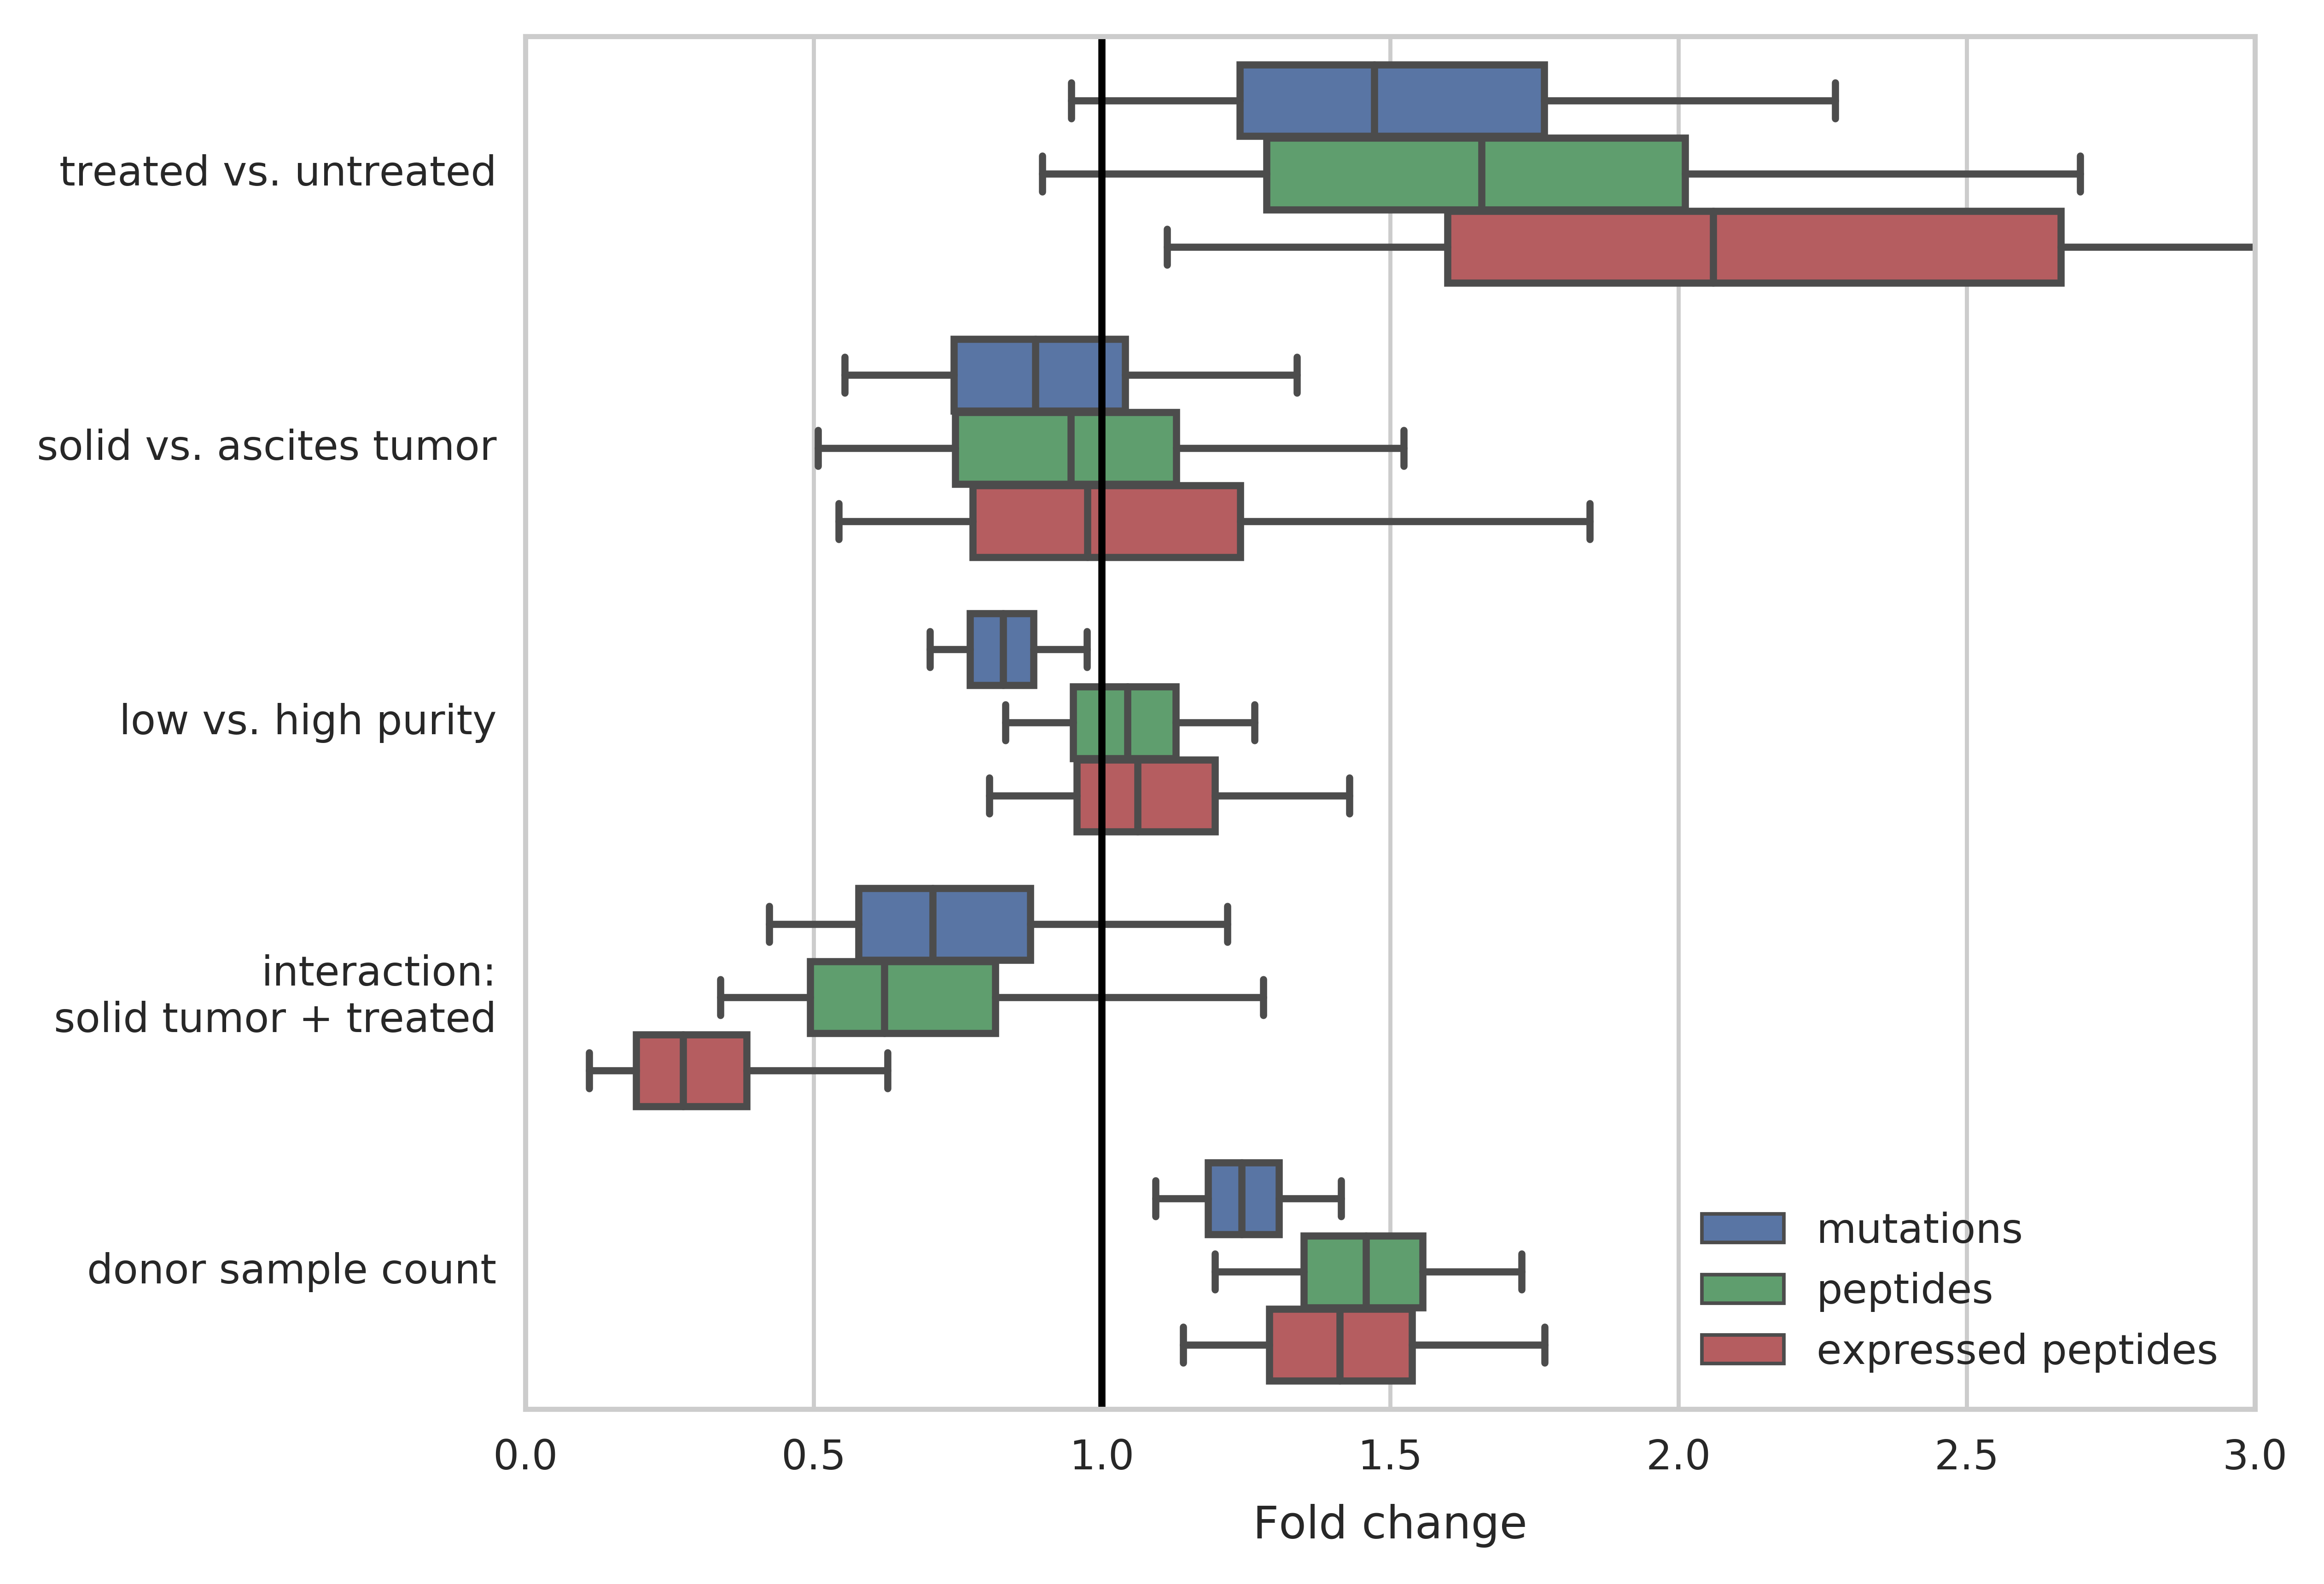

In [101]:
nice_melted = melted.copy()
nice_melted.variable = nice_melted.variable.map(lambda x: {
        "low_cellularity": "low purity",
        "num_sources_for_donor": "donor sample count"
}.get(x, x))
renames = {
    'treated': 'treated vs. untreated',
    'solid': 'solid vs. ascites tumor',
    'low purity': 'low vs. high purity',
    'solid and treated': 'interaction:\nsolid tumor + treated',
    'donor sample count': 'donor sample count',
}
nice_melted.variable = nice_melted.variable.map(renames)

seaborn.set_context('paper')
seaborn.set_style("whitegrid")
seaborn.boxplot(
    data=nice_melted,
    y='variable',
    x='value',
    hue='y_label',
    order=[renames.get(x, x) for x in ["treated", "solid", "low purity", "solid and treated", "donor sample count"]],
    hue_order=["mutations", "peptides", "expressed peptides"],
    whis=[5, 95],
    orient='h',
    showbox=True,
    showfliers=False,
#    meanline=True,
#    showmeans=True
)
pyplot.xlim(xmin=0,xmax=3)
pyplot.ylabel("")
pyplot.xlabel("Fold change")
pyplot.legend(title=None, loc='lower right')
pyplot.axvline(1.0, color="black")
pyplot.tight_layout()
pyplot.savefig("../figures/bayesian_model_effects.pdf")

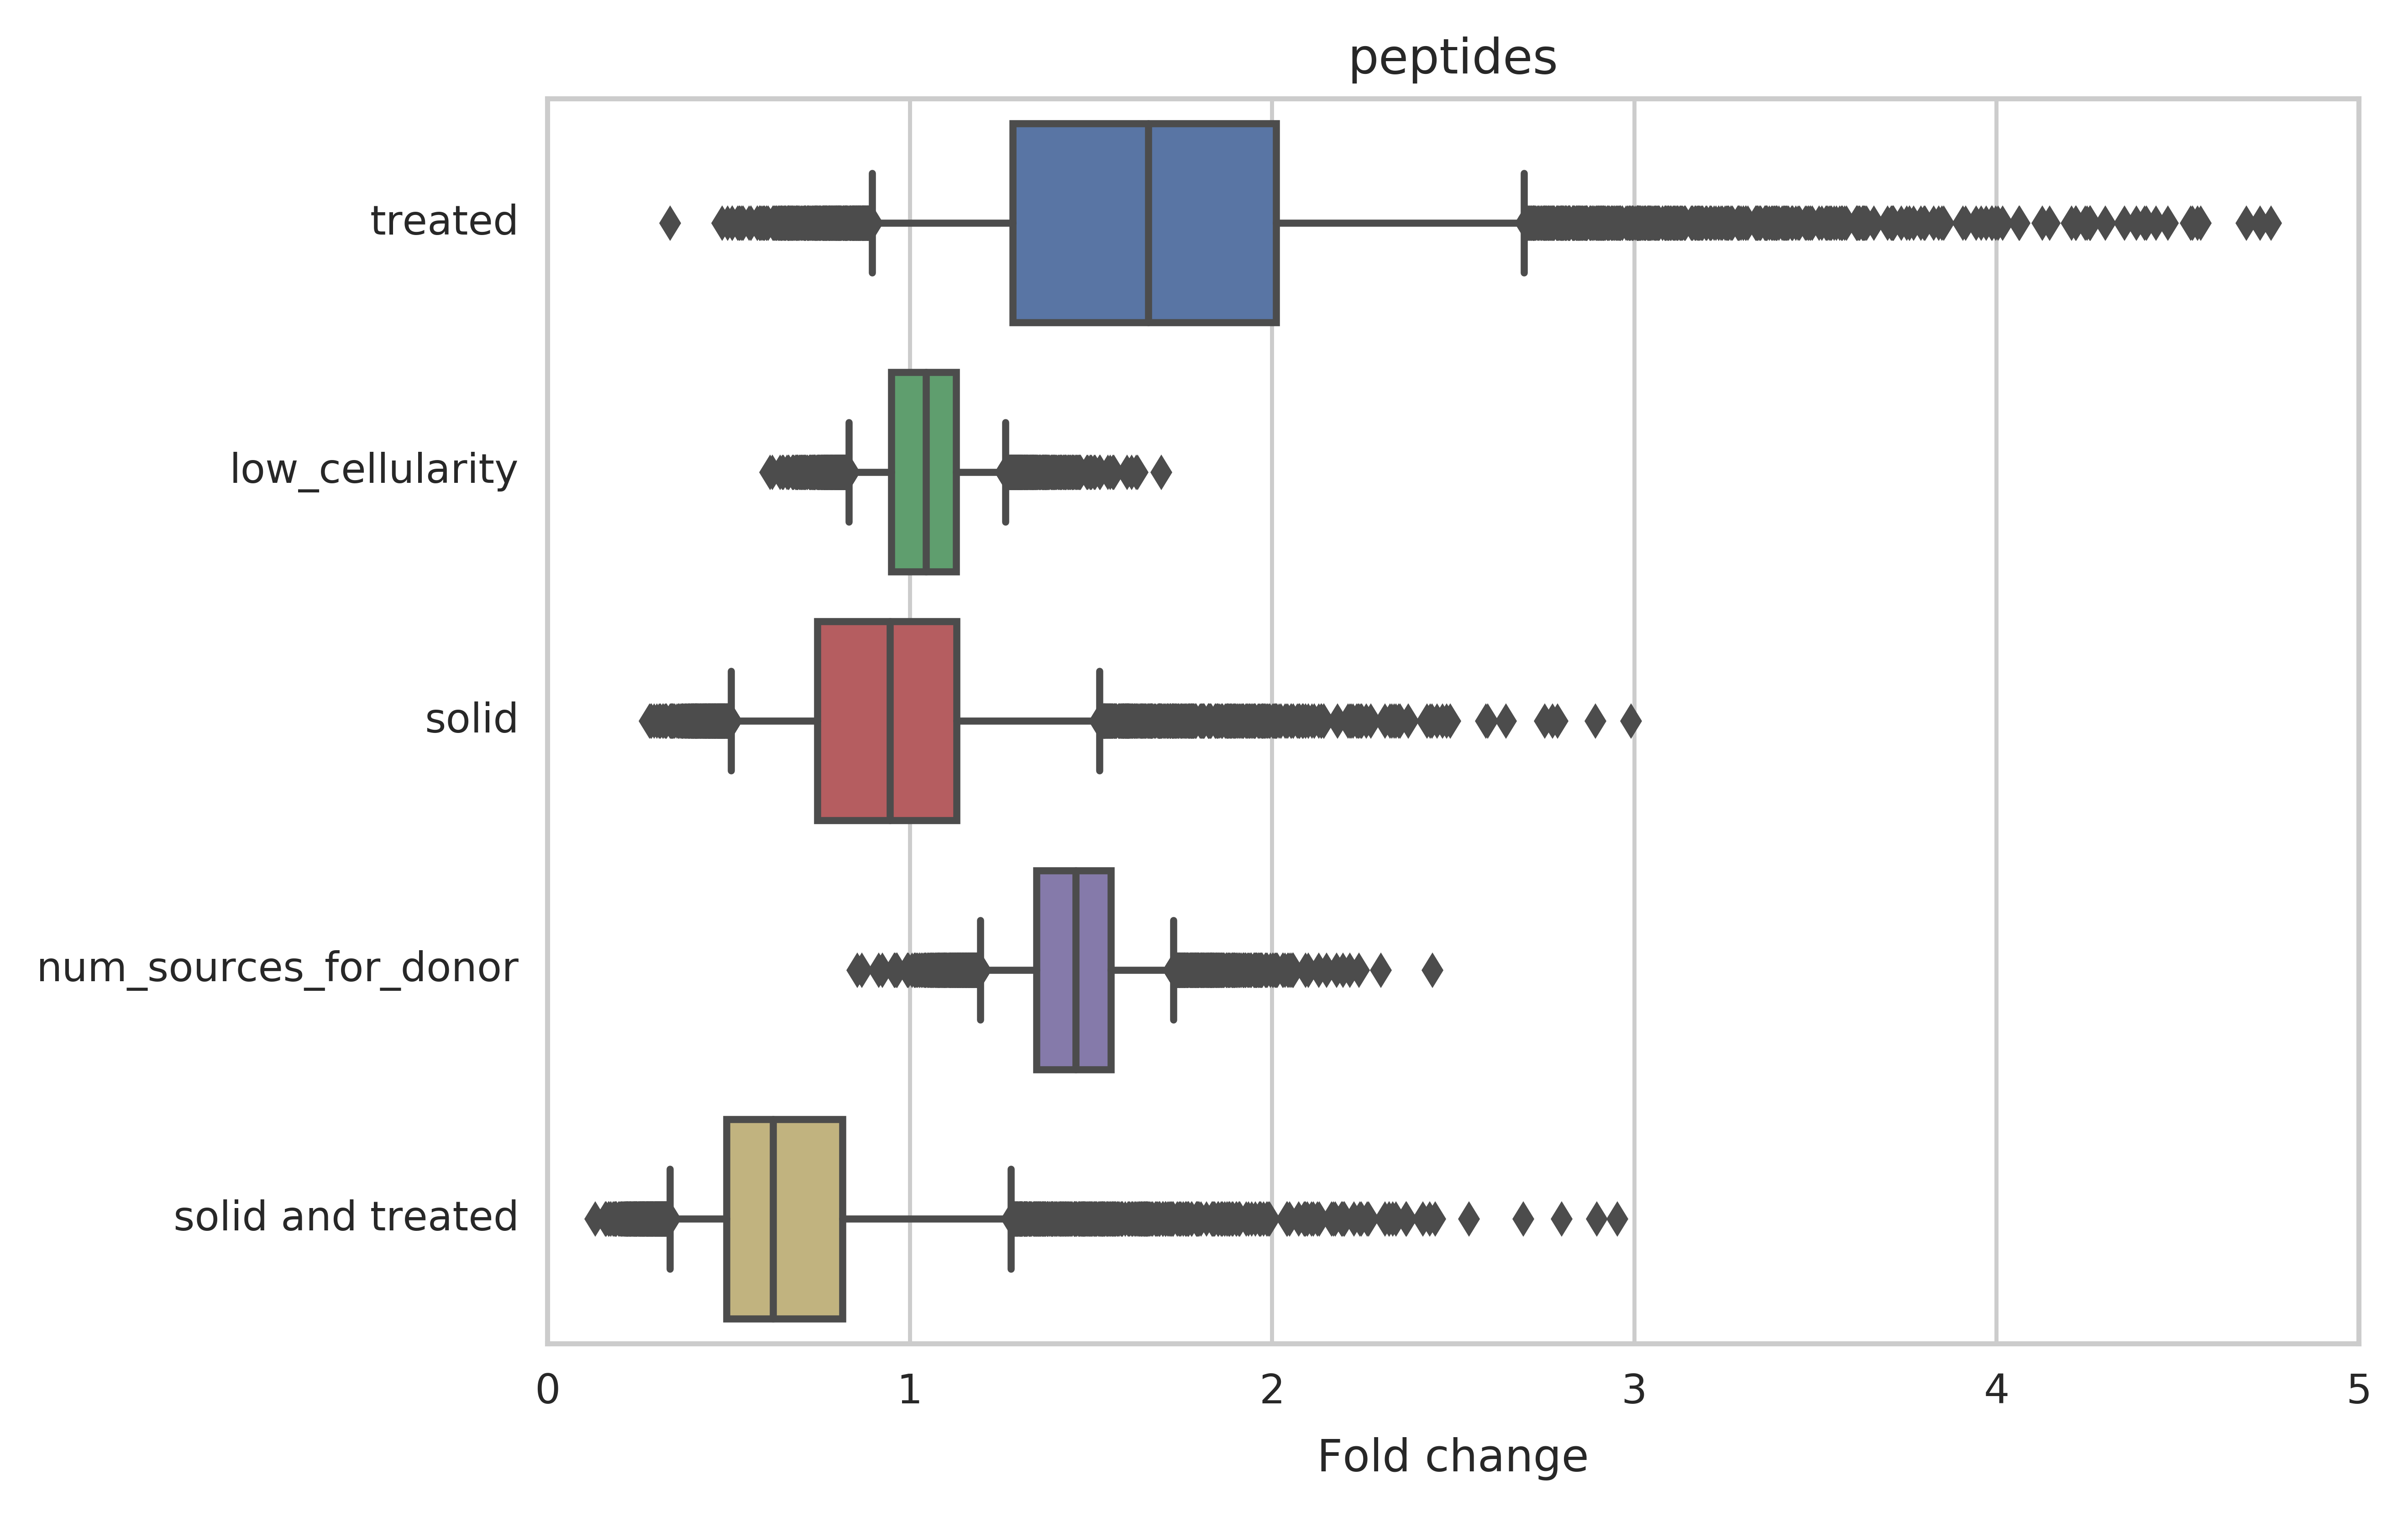

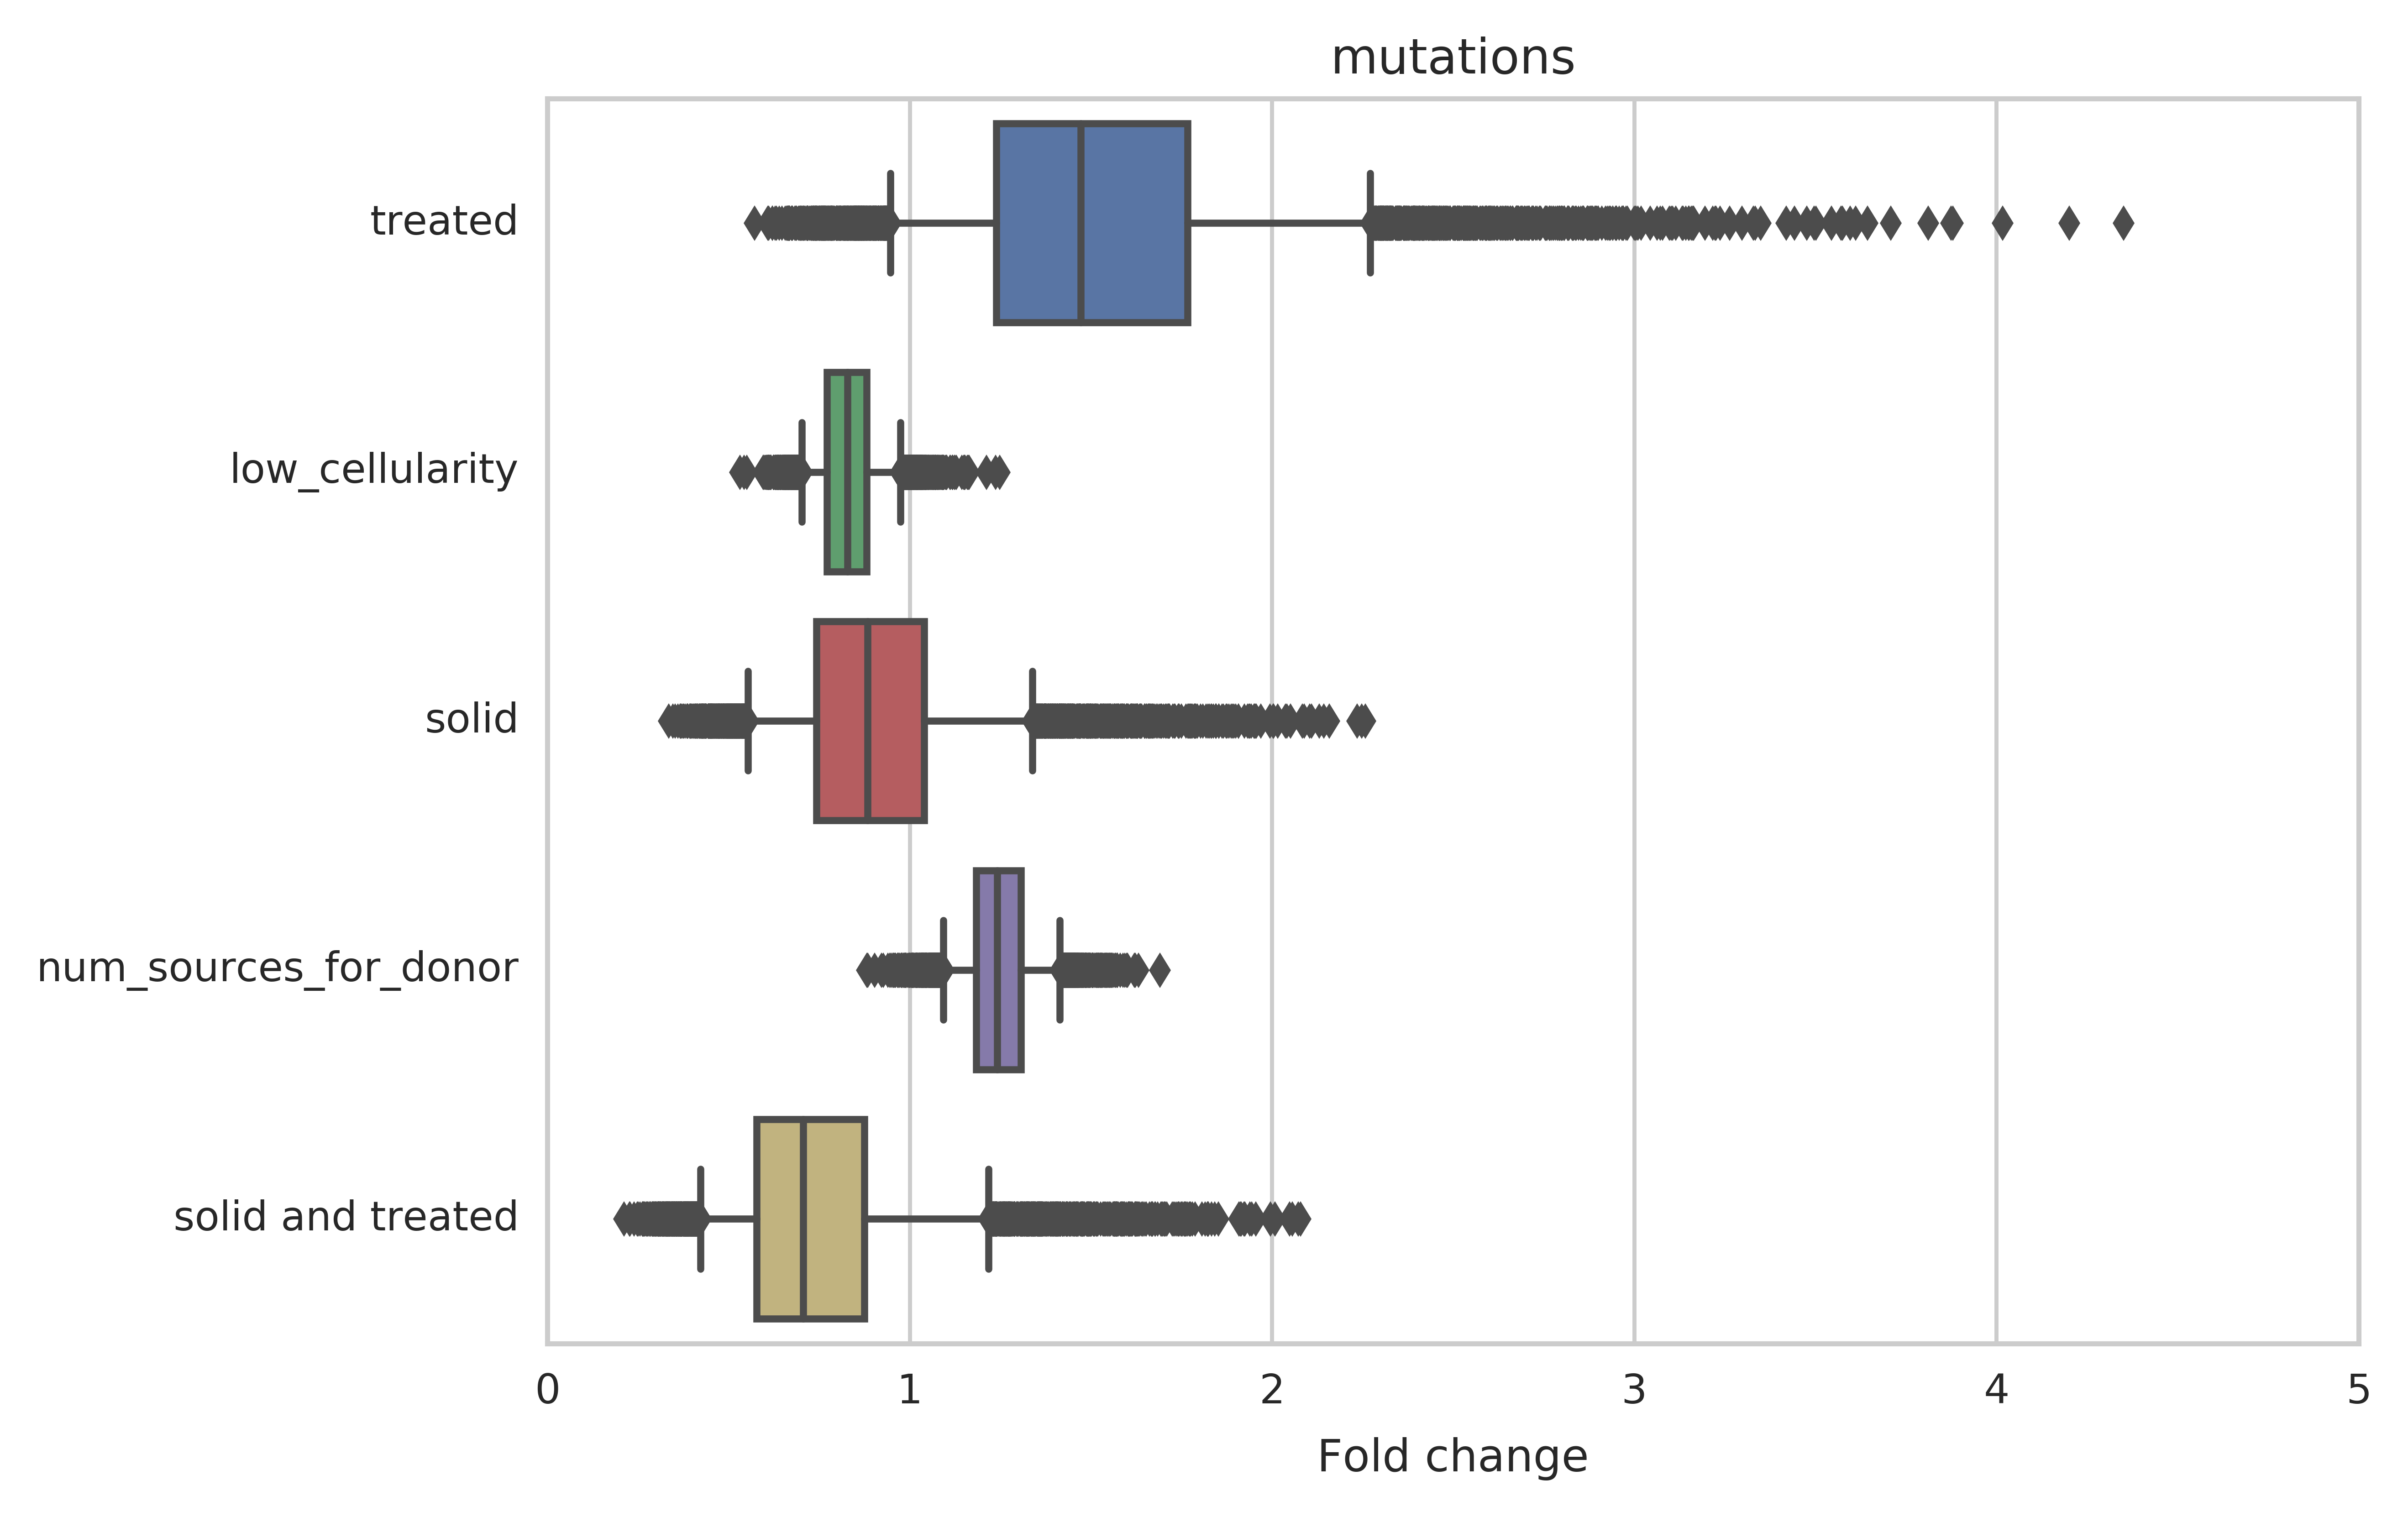

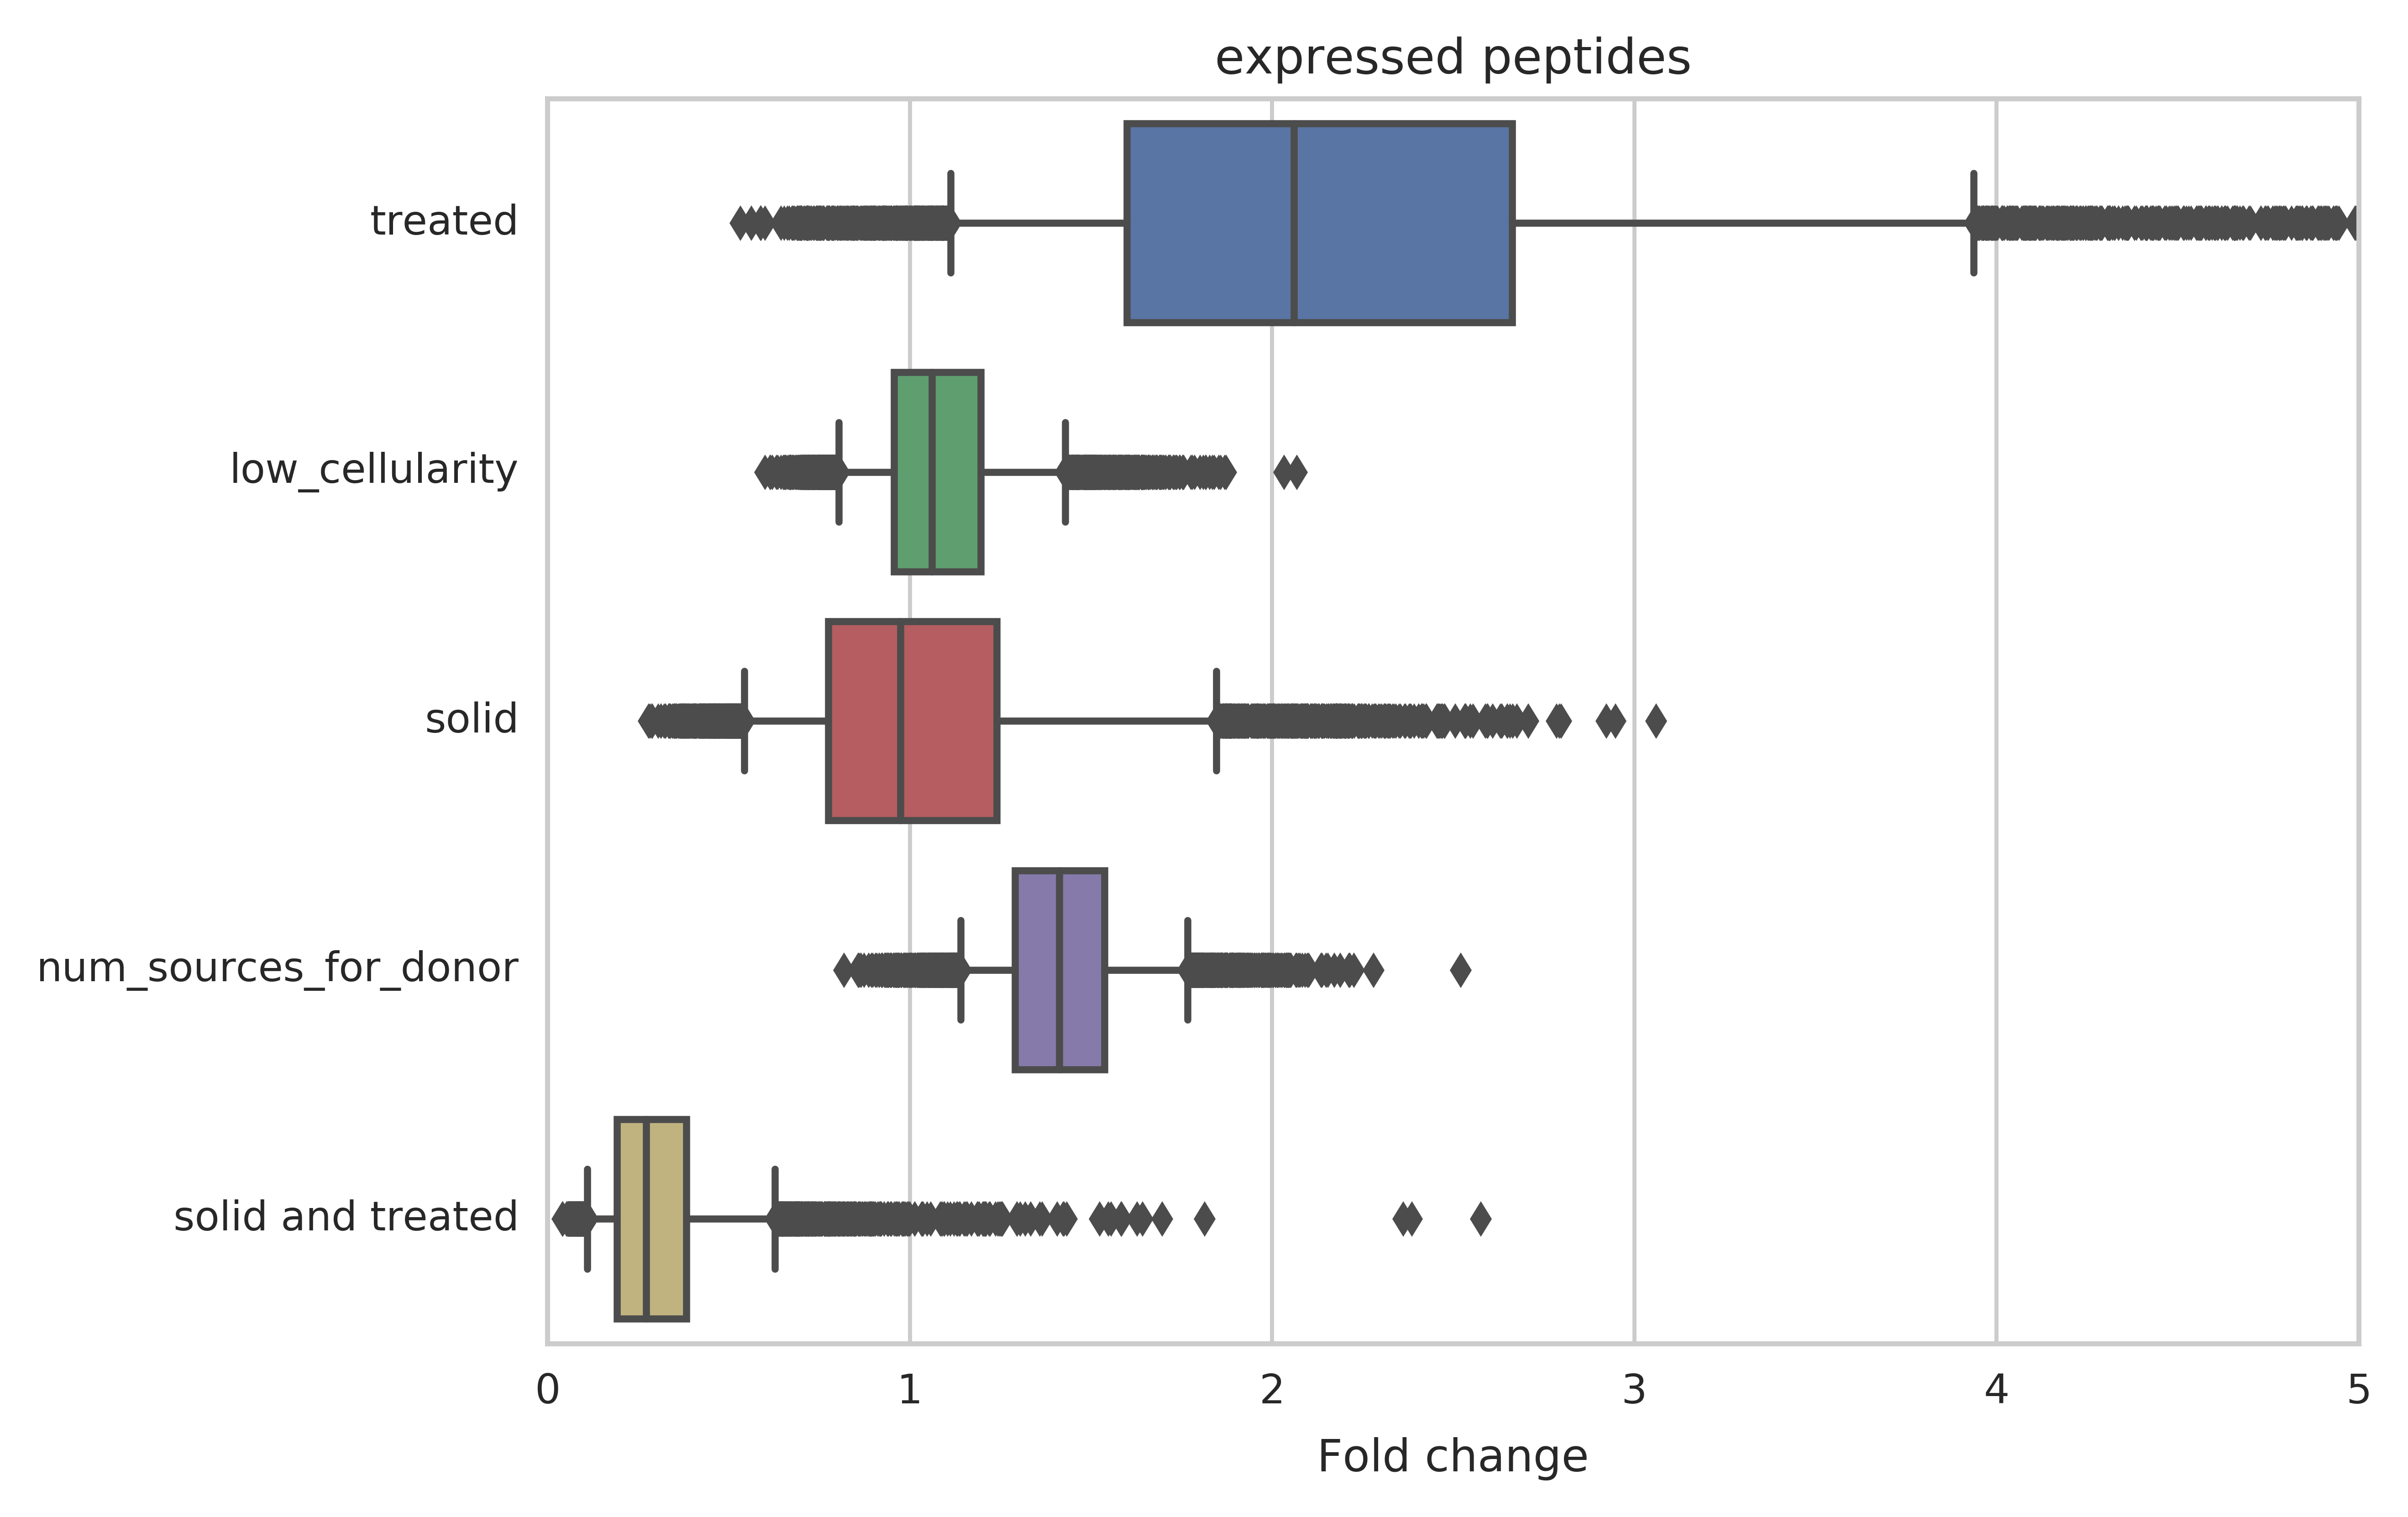

In [102]:
for y_label in fit_results:
    pyplot.figure()
    pyplot.title(y_label)
    seaborn.boxplot(
        data=all_fit_coefficients[all_fit_coefficients.y_label == y_label],
        orient="h",
        whis=[5, 95])

    pyplot.xlabel("Fold change")
    pyplot.xlim(xmin=0, xmax=5)


In [103]:
for y_label in fit_results:
    print(y_label)
    print(all_fit_coefficients[all_fit_coefficients.y_label == y_label].quantile(0.5))
    print("--")

    print(all_fit_coefficients[all_fit_coefficients.y_label == y_label].quantile(0.05))
    print(all_fit_coefficients[all_fit_coefficients.y_label == y_label].quantile(0.95))
    print("")

peptides
treated                  1.659399
low_cellularity          1.045294
solid                    0.946373
num_sources_for_donor    1.458475
solid and treated        0.623584
dtype: float64
--
treated                  0.896816
low_cellularity          0.833395
solid                    0.508231
num_sources_for_donor    1.196348
solid and treated        0.339191
dtype: float64
treated                  2.697227
low_cellularity          1.265048
solid                    1.524208
num_sources_for_donor    1.728654
solid and treated        1.280733
dtype: float64

mutations
treated                  1.472787
low_cellularity          0.829501
solid                    0.884828
num_sources_for_donor    1.242653
solid and treated        0.707184
dtype: float64
--
treated                  0.947687
low_cellularity          0.702541
solid                    0.554721
num_sources_for_donor    1.093977
solid and treated        0.423365
dtype: float64
treated                  2.272445
low_cellularity

In [104]:
numpy.exp(extracted["donor_mean"]).mean()

37.22681064755254

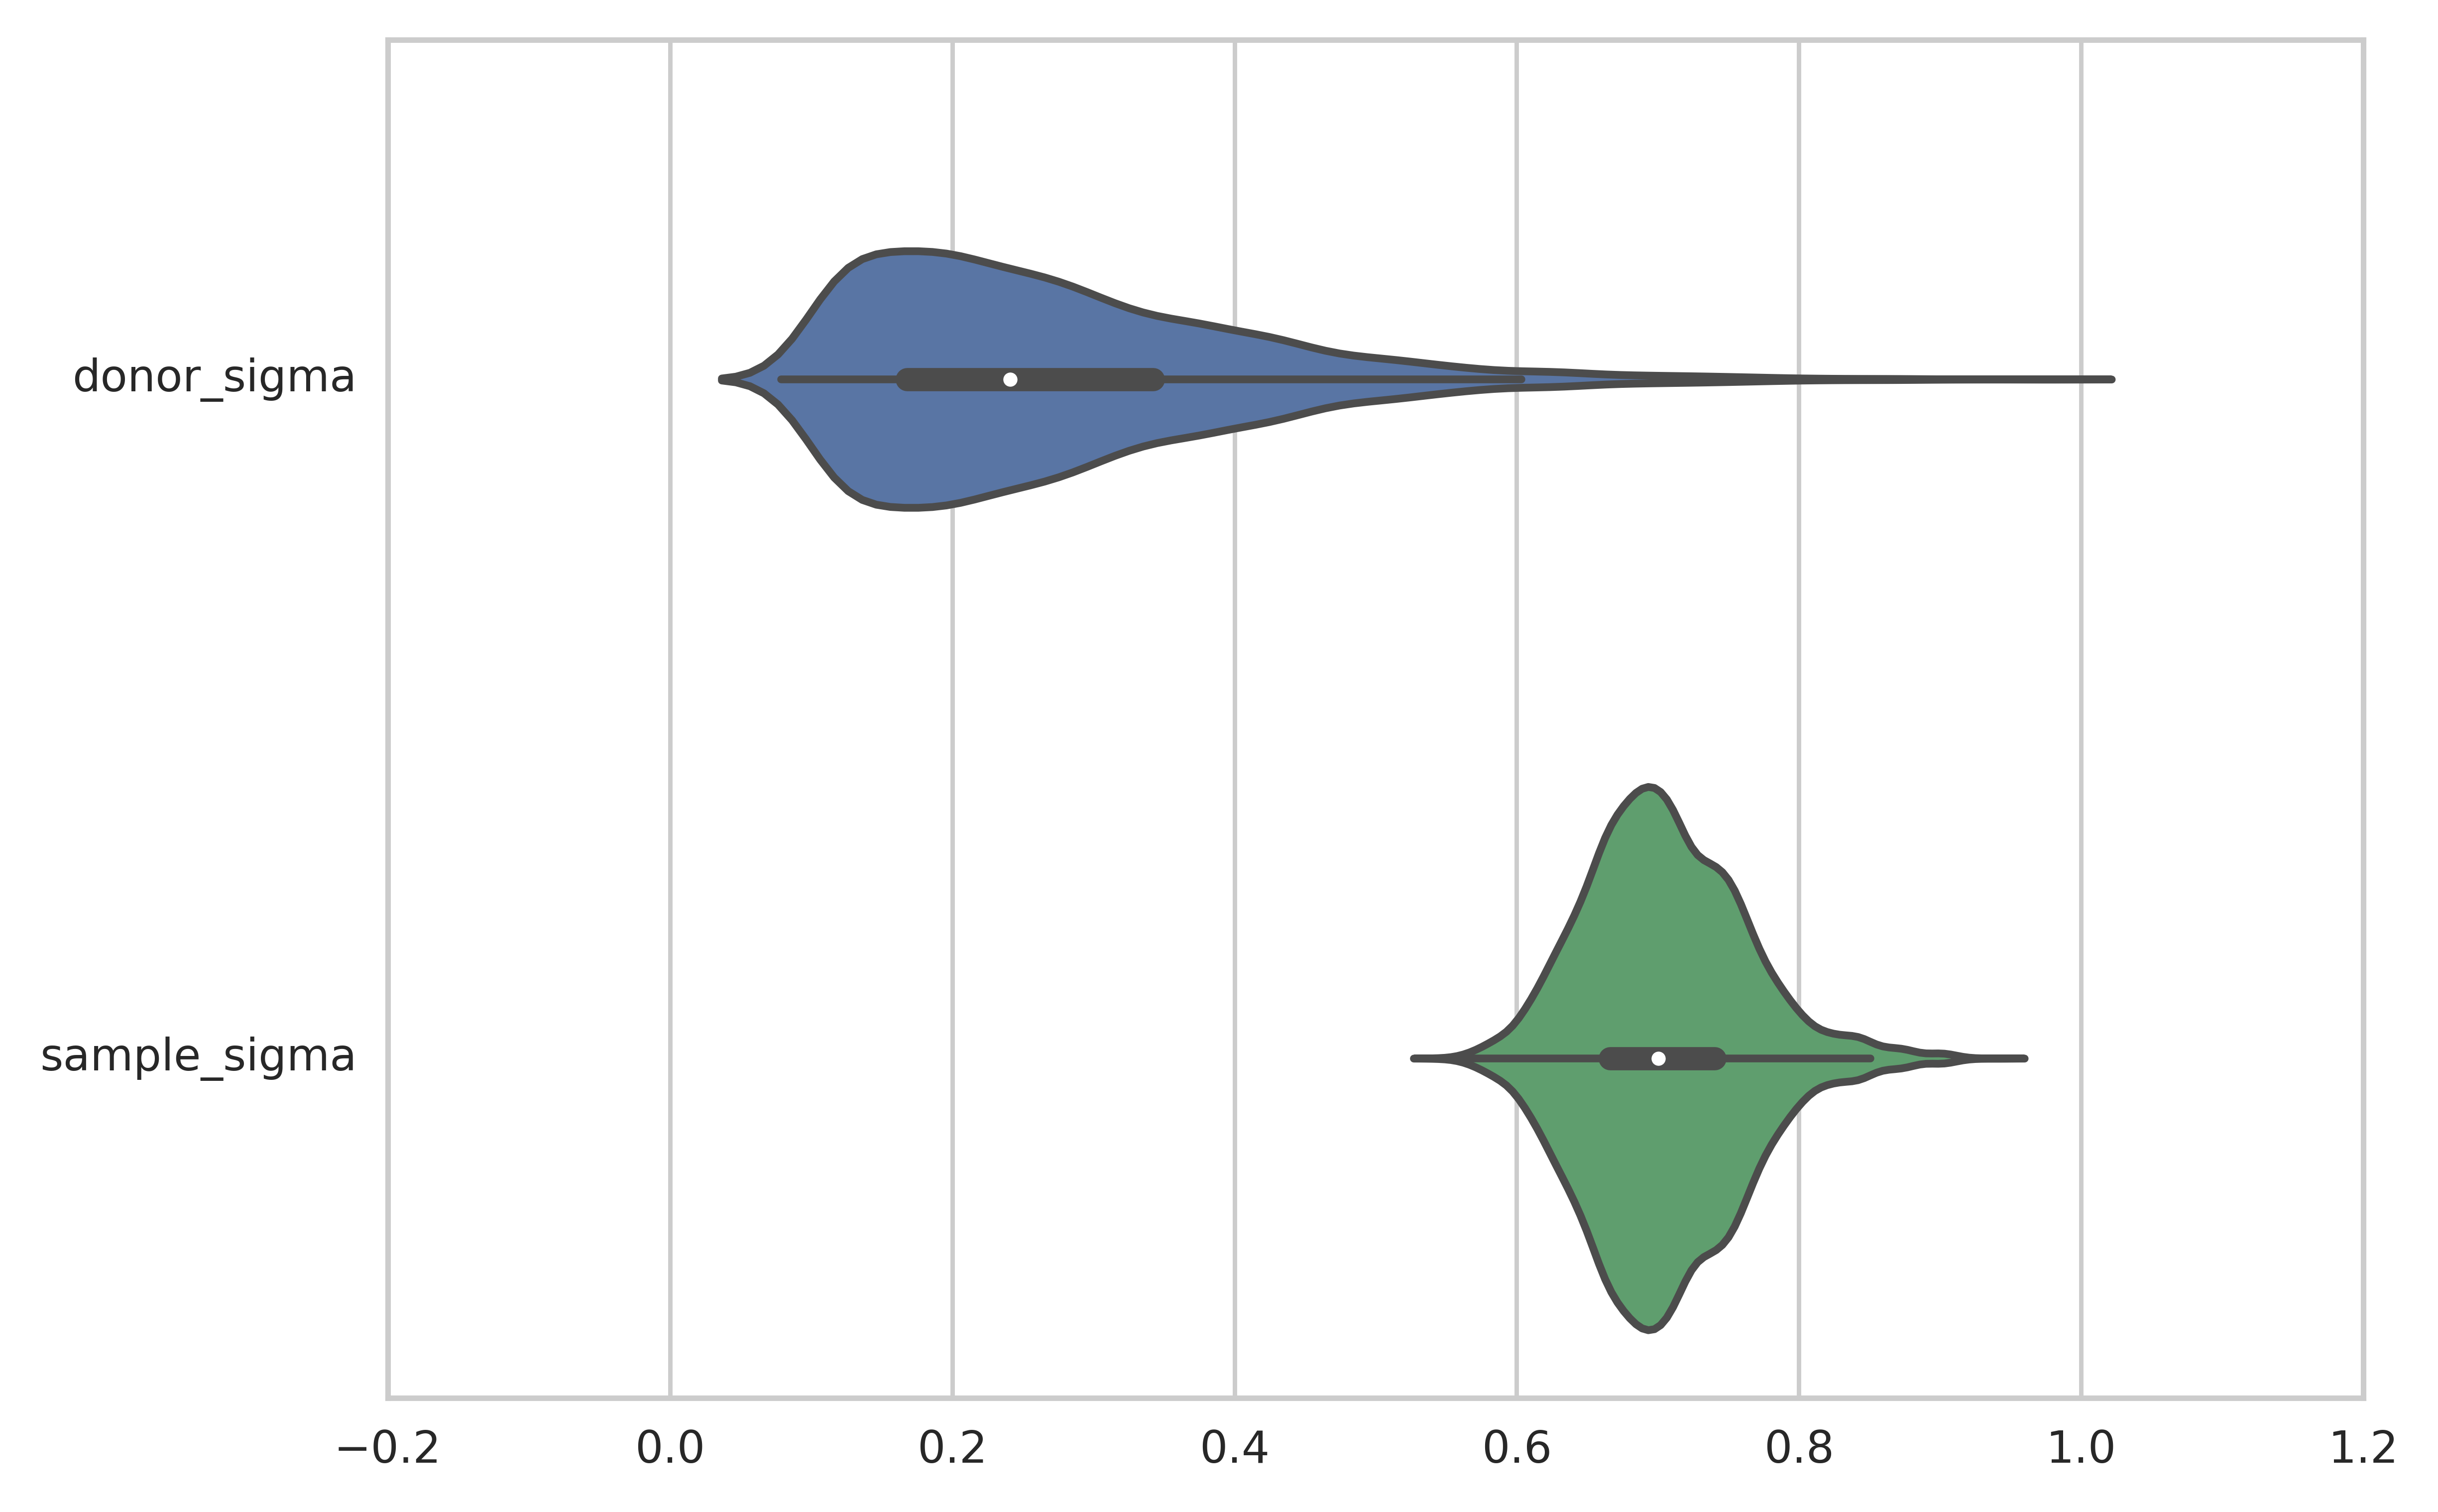

In [105]:
fit_scalars = pandas.DataFrame(
    dict((field, extracted[field])
         for field in ["donor_sigma", "sample_sigma"]))
seaborn.violinplot(fit_scalars, orient="h")

### Posterior predictive checking

#### prep data for pp-checks

In [106]:
all_fit_yreps = []
for (y_label, fit) in fit_results.items():
    extracted = fit.extract()
    
    # extract & reshape posterior predicted distribution (y-reps)
    fit_yreps = pandas.DataFrame(extracted['y_rep'],
                           columns=data_by_predicted[y_label].index)
    fit_yreps.index.name = 'iter'
    fit_yreps_long = pandas.DataFrame(fit_yreps.stack())
    fit_yreps_long.reset_index(0, inplace = True)
    fit_ppd = fit_yreps_long
    fit_ppd.columns = ['iter','value']
    fit_ppd['variable'] = y_label
    fit_ppd['value_type'] = 'estimated'
    fit_ppd.reset_index(0, inplace = True)
    fit_ppd['y_rep'] = fit_ppd.value
    
    ## prep observed data to append to y_reps
    obs_y = pandas.DataFrame(data_by_predicted[y_label].y)
    obs_y.columns = ['value']
    obs_y = obs_y.reset_index()
    obs_y['variable'] = y_label
    obs_y['value_type'] = 'observed'
    obs_y['iter'] = 0
    obs_y['y_obs'] = obs_y.value
    
    ## append observed & replicated data
    combined_ppd = pandas.DataFrame.append(fit_ppd, obs_y)
    
    ## append to data prepped earlier
    all_fit_yreps.append(combined_ppd)

all_fit_yreps = pandas.concat(all_fit_yreps, ignore_index=True)
all_fit_yreps.index = all_fit_yreps.source_id
all_fit_yreps = all_fit_yreps.drop('source_id', axis = 1)
all_fit_yreps.head()

iter     value value_type  variable  y_obs     y_rep
source_id                                                                 
AOCS-001-1/SP101515      0  5.487404  estimated  peptides    NaN  5.487404
AOCS-002-1/SP101517      0  4.850827  estimated  peptides    NaN  4.850827
AOCS-004-1/SP101519      0  4.962104  estimated  peptides    NaN  4.962104
AOCS-005-1/SP101521      0  4.354390  estimated  peptides    NaN  4.354390
AOCS-034-13/SP101524     0  6.031072  estimated  peptides    NaN  6.031072

In [107]:
clin_data = data_by_predicted['mutations'].drop('y',axis = 1)
#clin_data.reset_index(0, inplace = True)
clin_data.head()

donor treated low_cellularity  solid  \
source_id                                                    
AOCS-001-1/SP101515       0   False            True   True   
AOCS-002-1/SP101517       1   False           False   True   
AOCS-004-1/SP101519       2   False            True   True   
AOCS-005-1/SP101521       3   False           False   True   
AOCS-034-13/SP101524      4    True           False  False   

                      num_sources_for_donor solid and treated  
source_id                                                      
AOCS-001-1/SP101515                       1             False  
AOCS-002-1/SP101517                       1             False  
AOCS-004-1/SP101519                       1             False  
AOCS-005-1/SP101521                       1             False  
AOCS-034-13/SP101524                      2             False

In [108]:
plot_ppd = clin_data.join(all_fit_yreps)
plot_ppd = plot_ppd.reset_index()
plot_ppd['value_type'] = plot_ppd['value_type'].astype('category')
plot_ppd['variable'] = plot_ppd['variable'].astype('category')
plot_ppd.head()


source_id  donor treated low_cellularity solid  \
0  AOCS-001-1/SP101515      0   False            True  True   
1  AOCS-001-1/SP101515      0   False            True  True   
2  AOCS-001-1/SP101515      0   False            True  True   
3  AOCS-001-1/SP101515      0   False            True  True   
4  AOCS-001-1/SP101515      0   False            True  True   

   num_sources_for_donor solid and treated  iter     value value_type  \
0                      1             False     0  5.487404  estimated   
1                      1             False     1  4.297078  estimated   
2                      1             False     2  4.721523  estimated   
3                      1             False     3  5.444812  estimated   
4                      1             False     4  5.132523  estimated   

   variable  y_obs     y_rep  
0  peptides    NaN  5.487404  
1  peptides    NaN  4.297078  
2  peptides    NaN  4.721523  
3  peptides    NaN  5.444812  
4  peptides    NaN  5.132523

#### pp-checks overall

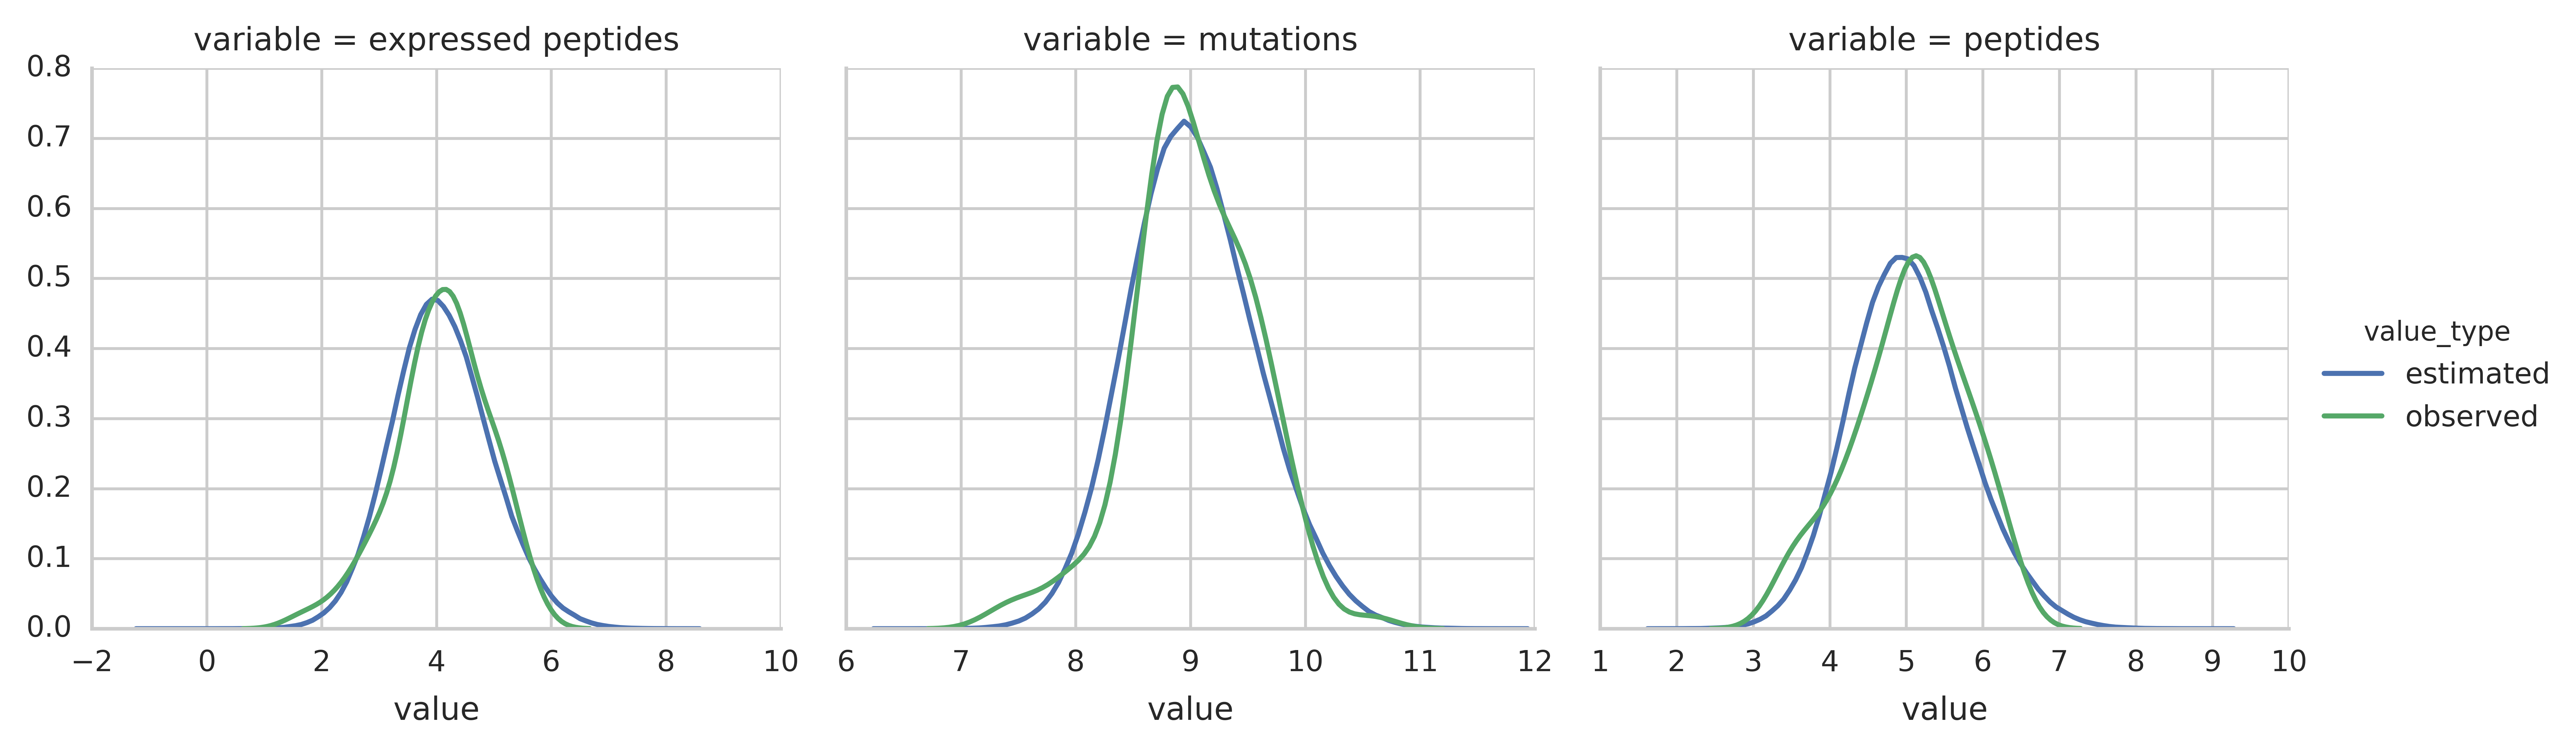

In [109]:
## plot posterior predictive checks, including all iterations
g = seaborn.FacetGrid(plot_ppd, col="variable", hue='value_type', sharex=False,)
g.map(seaborn.distplot, "value", hist = False)
g.add_legend()


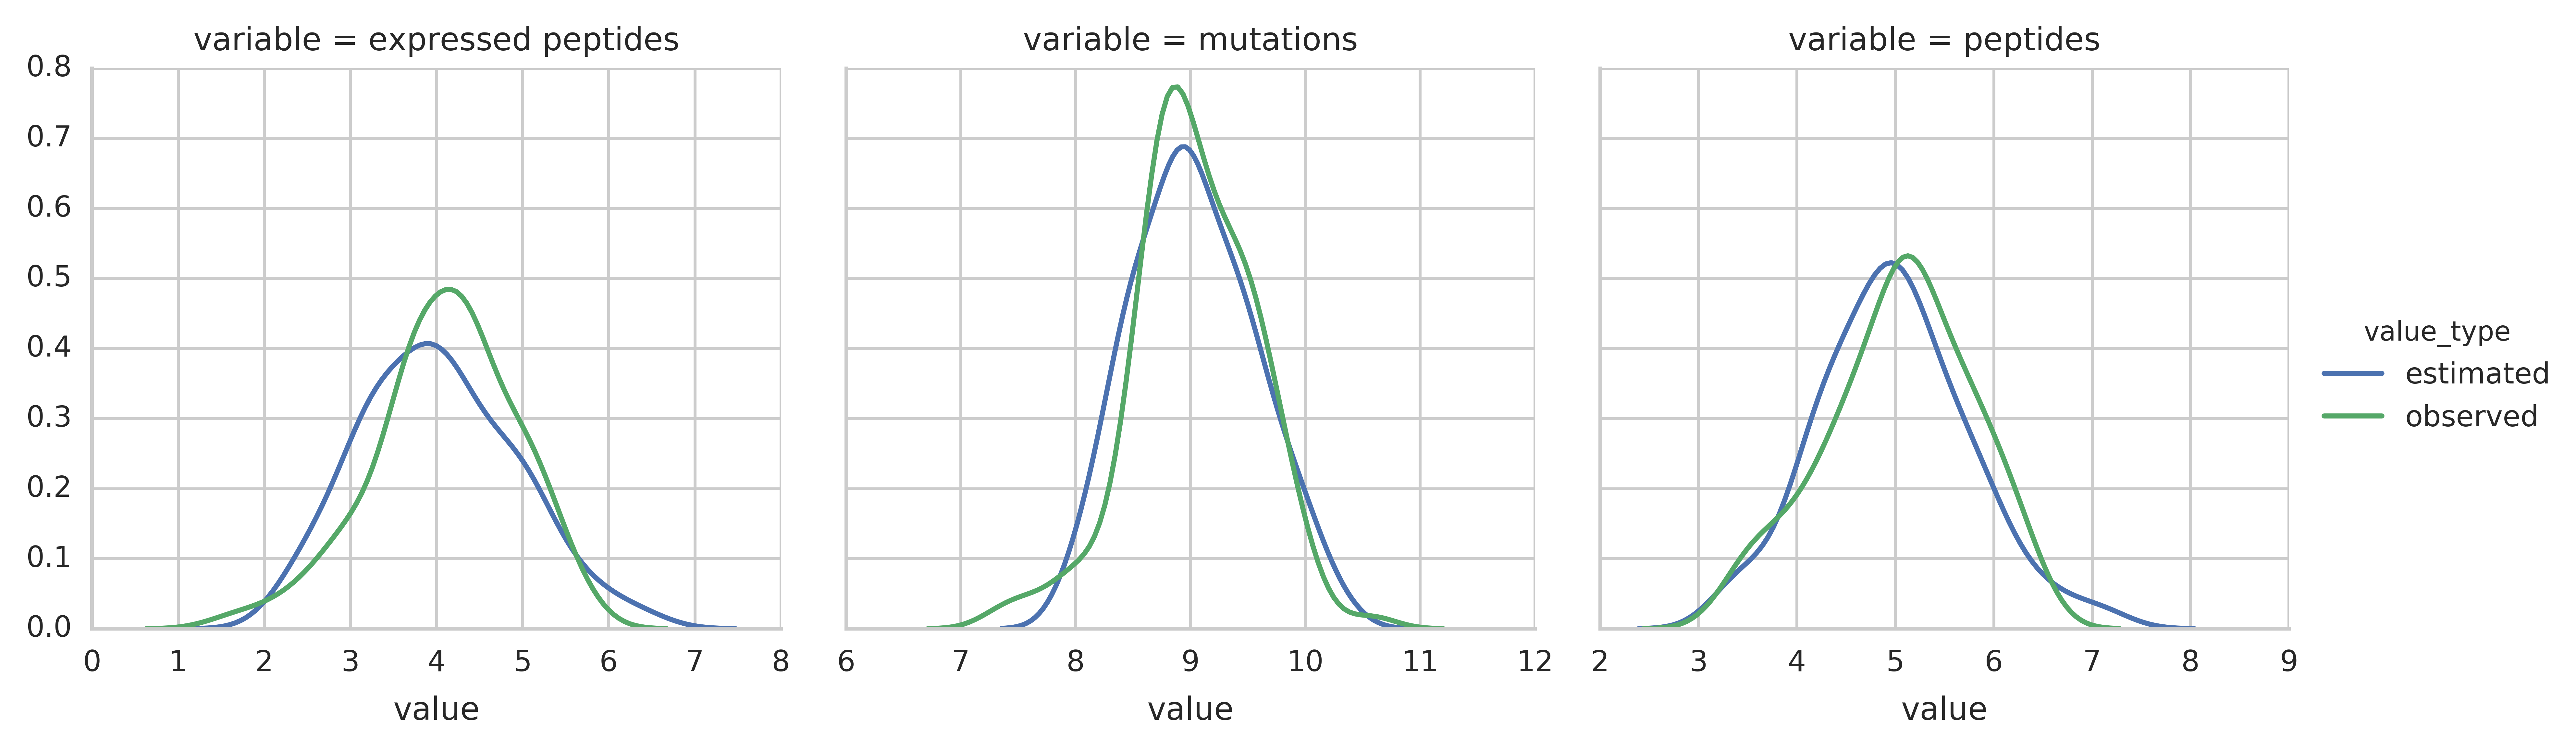

In [110]:
## plot posterior predictive checks, showing draw from a single random iteration
## (would ideally show several iterations in blue & overlay observed iteration in green, but .. alas.
##   .. for that, my seaborn/matplotlib skills would need to improve!)
def select_random_iter(data):
    return data.query('iter == {0} or value_type == "observed"'.format(
            numpy.random.choice(range(1,plot_ppd.iter.max()), 1)
        ))
    
g = seaborn.FacetGrid(
    data=select_random_iter(plot_ppd), 
    col="variable", 
    hue="value_type", 
    sharex=False,
    )
g.map(seaborn.distplot, "value", hist = False)
g.add_legend()

#### pp-checks comparing solid vs ascites

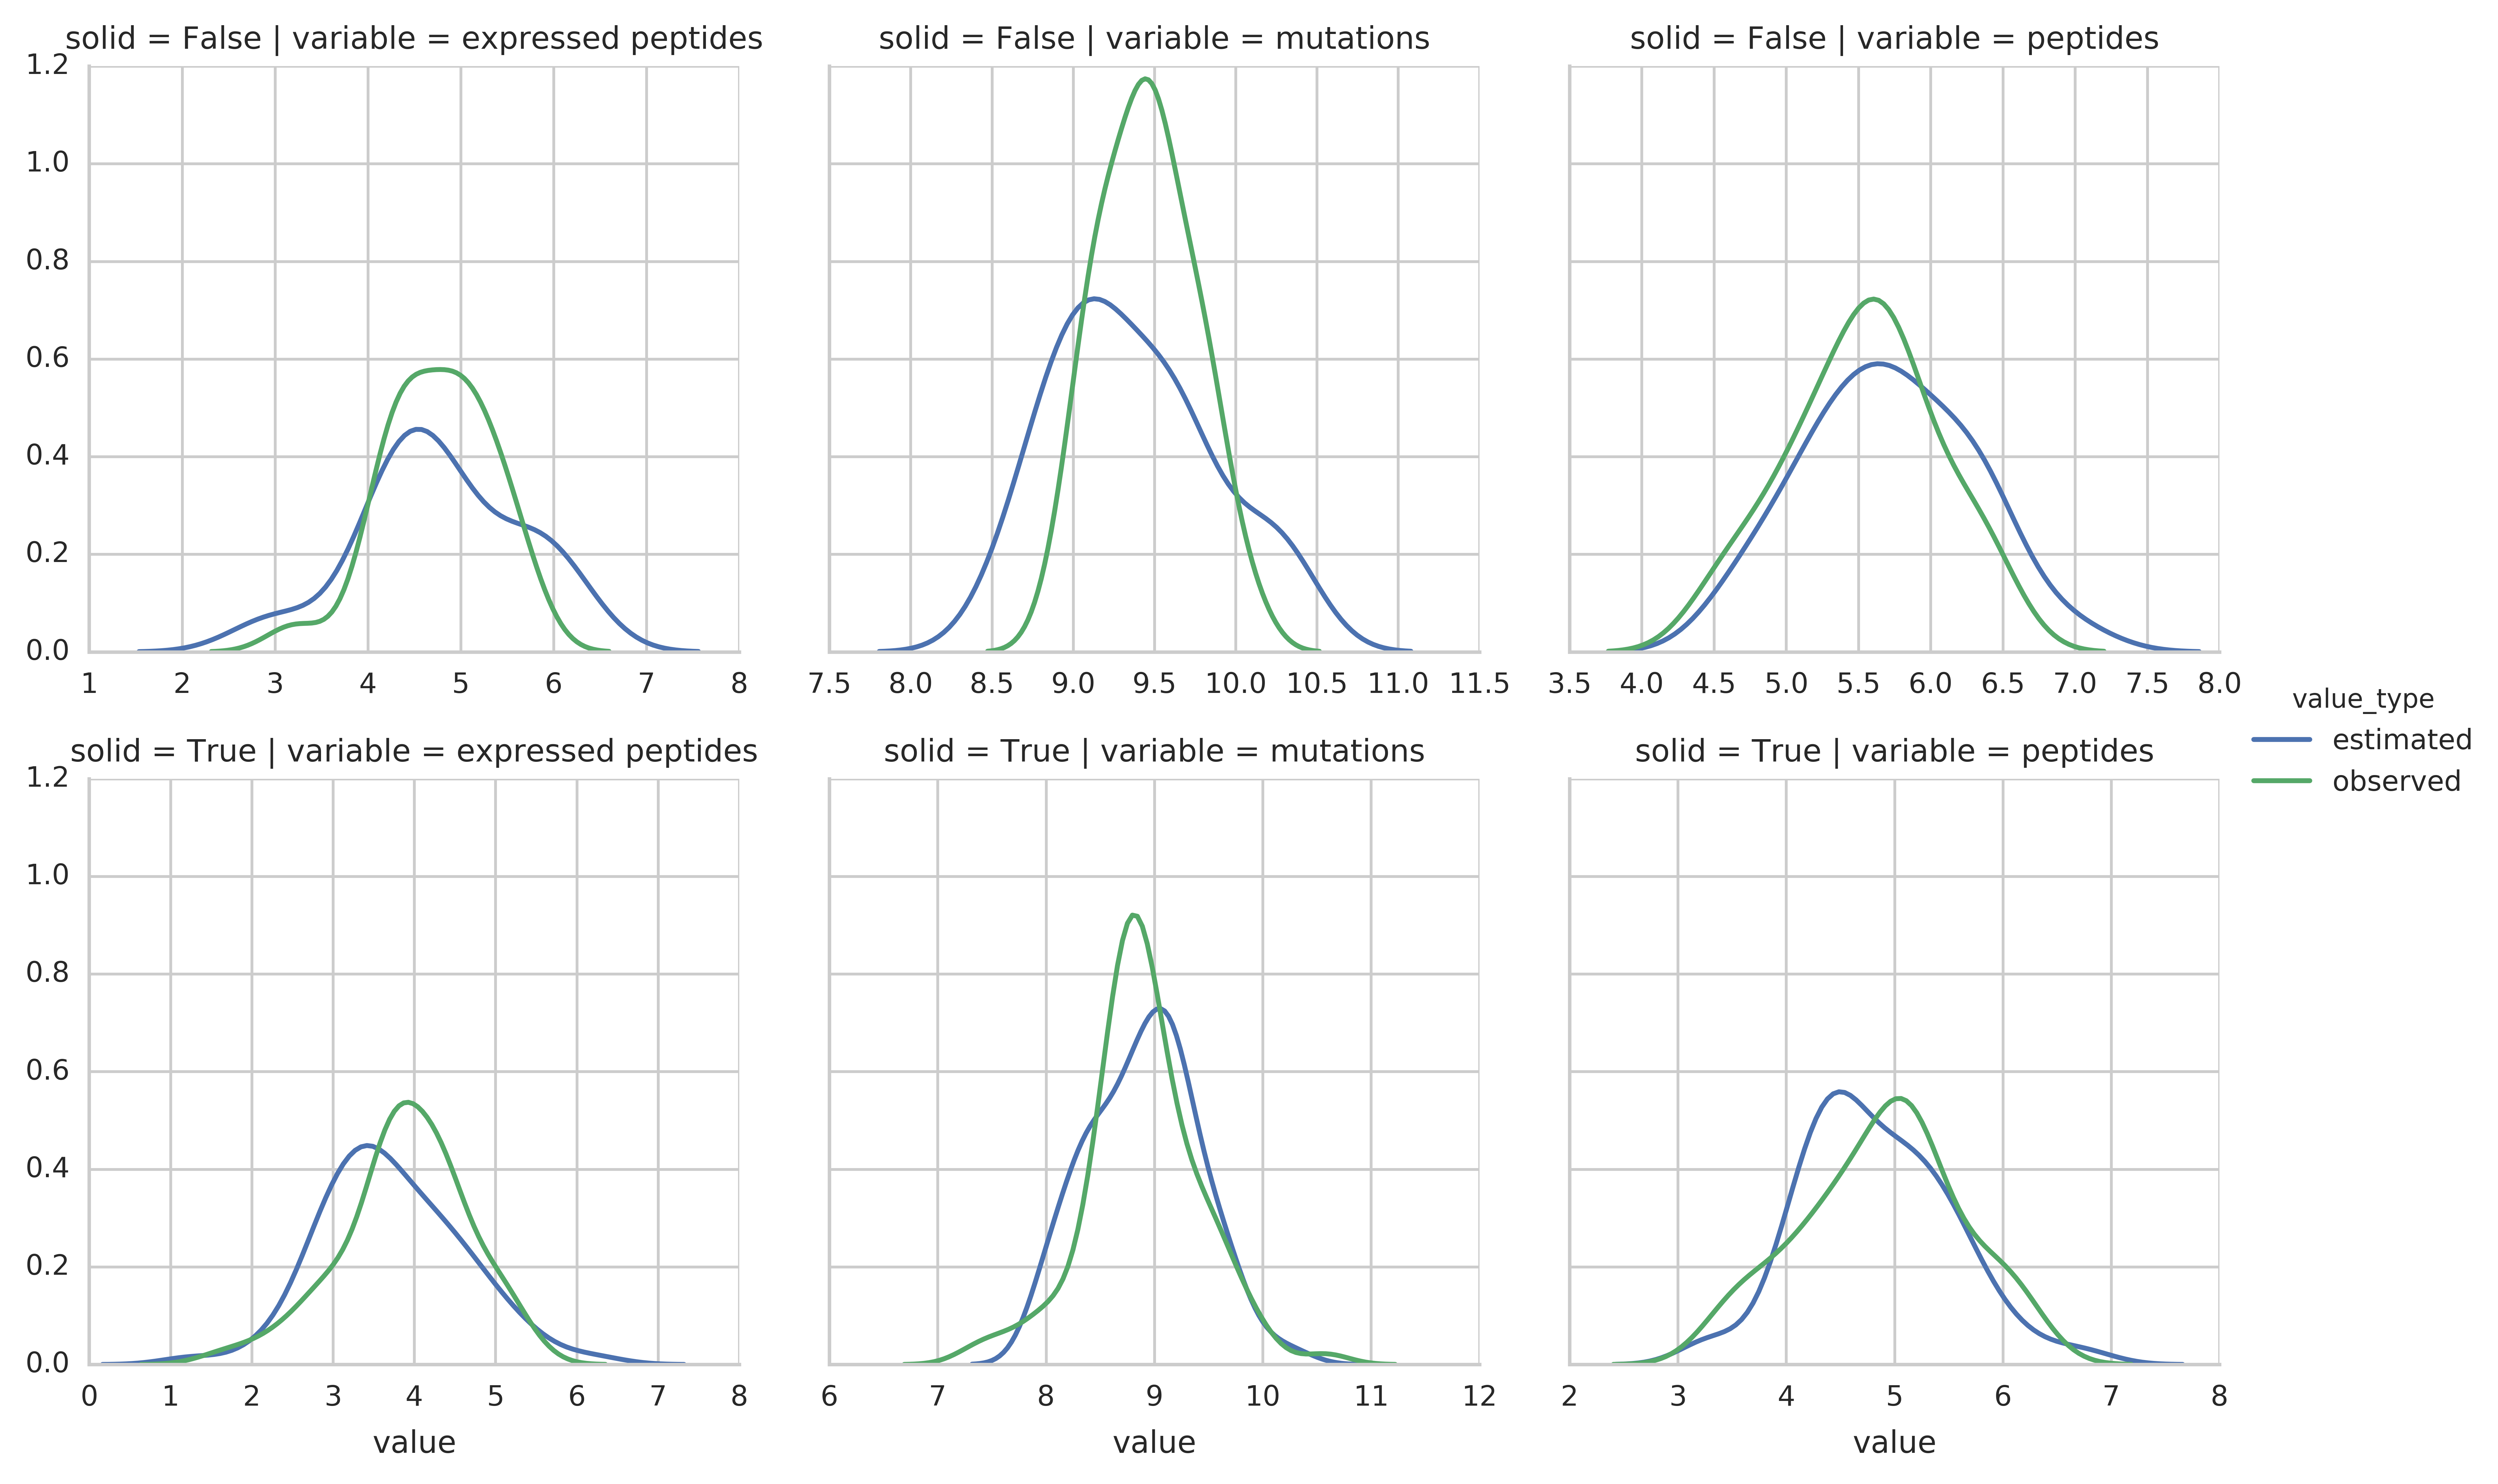

In [111]:
## plot by solid vs ascites
g = seaborn.FacetGrid(select_random_iter(plot_ppd),
                      col="variable",
                      row="solid", 
                      hue="value_type", 
                      sharex=False,)
g.map(seaborn.distplot, "value", hist = False)
g.add_legend()


In [112]:
## Based on the above, might hypothesize that ascites & solid samples might 
## have different amounts of variation in observed data

## we can check this by computing, for each iteration, the MINIMUM value observed 
## ideally, this will be similar for replicated & observed data 
## restrict to "mutations" data since this is the first source of observed data

## we will want to compute this overall, and also for ascites & solid tumors separately
## here, compute by ascites/solid first since this can be summarized into an overall min
grouped_muttype = plot_ppd.query("variable == 'mutations'").groupby(['iter','solid'])
grouped_muttype_min = grouped_muttype.aggregate(numpy.min).reset_index()
grouped_muttype_min['min_value'] = grouped_muttype_min.y_rep
grouped_muttype_min.head()


iter  solid  donor low_cellularity  num_sources_for_donor  \
0     0  False      4           False                      1   
1     0   True      0           False                      1   
2     1  False      4           False                      1   
3     1   True      0           False                      1   
4     2  False      4           False                      1   

  solid and treated             source_id treated     value     y_obs  \
0             False  AOCS-034-13/SP101524   False  8.504950  8.912339   
1             False   AOCS-001-1/SP101515   False  7.334329  7.334329   
2             False  AOCS-034-13/SP101524   False  8.686531       NaN   
3             False   AOCS-001-1/SP101515   False  7.753390       NaN   
4             False  AOCS-034-13/SP101524   False  9.070085       NaN   

      y_rep  min_value  
0  8.504950   8.504950  
1  7.815253   7.815253  
2  8.686531   8.686531  
3  7.753390   7.753390  
4  9.070085   9.070085

In [113]:
## now, aggregate by-ascites-vs-solid into overall
grouped_mut_min = grouped_muttype_min.groupby(['iter'])
grouped_mut_min = grouped_mut_min.aggregate(numpy.min).reset_index()
grouped_mut_min['min_value'] = grouped_mut_min.y_rep
grouped_mut_min.head()

iter  solid  donor low_cellularity  num_sources_for_donor  \
0     0  False      0           False                      1   
1     1  False      0           False                      1   
2     2  False      0           False                      1   
3     3  False      0           False                      1   
4     4  False      0           False                      1   

  solid and treated            source_id treated     value     y_obs  \
0             False  AOCS-001-1/SP101515   False  7.334329  7.334329   
1             False  AOCS-001-1/SP101515   False  7.753390       NaN   
2             False  AOCS-001-1/SP101515   False  7.232787       NaN   
3             False  AOCS-001-1/SP101515   False  7.887293       NaN   
4             False  AOCS-001-1/SP101515   False  7.884483       NaN   

      y_rep  min_value  
0  7.815253   7.815253  
1  7.753390   7.753390  
2  7.232787   7.232787  
3  7.887293   7.887293  
4  7.884483   7.884483

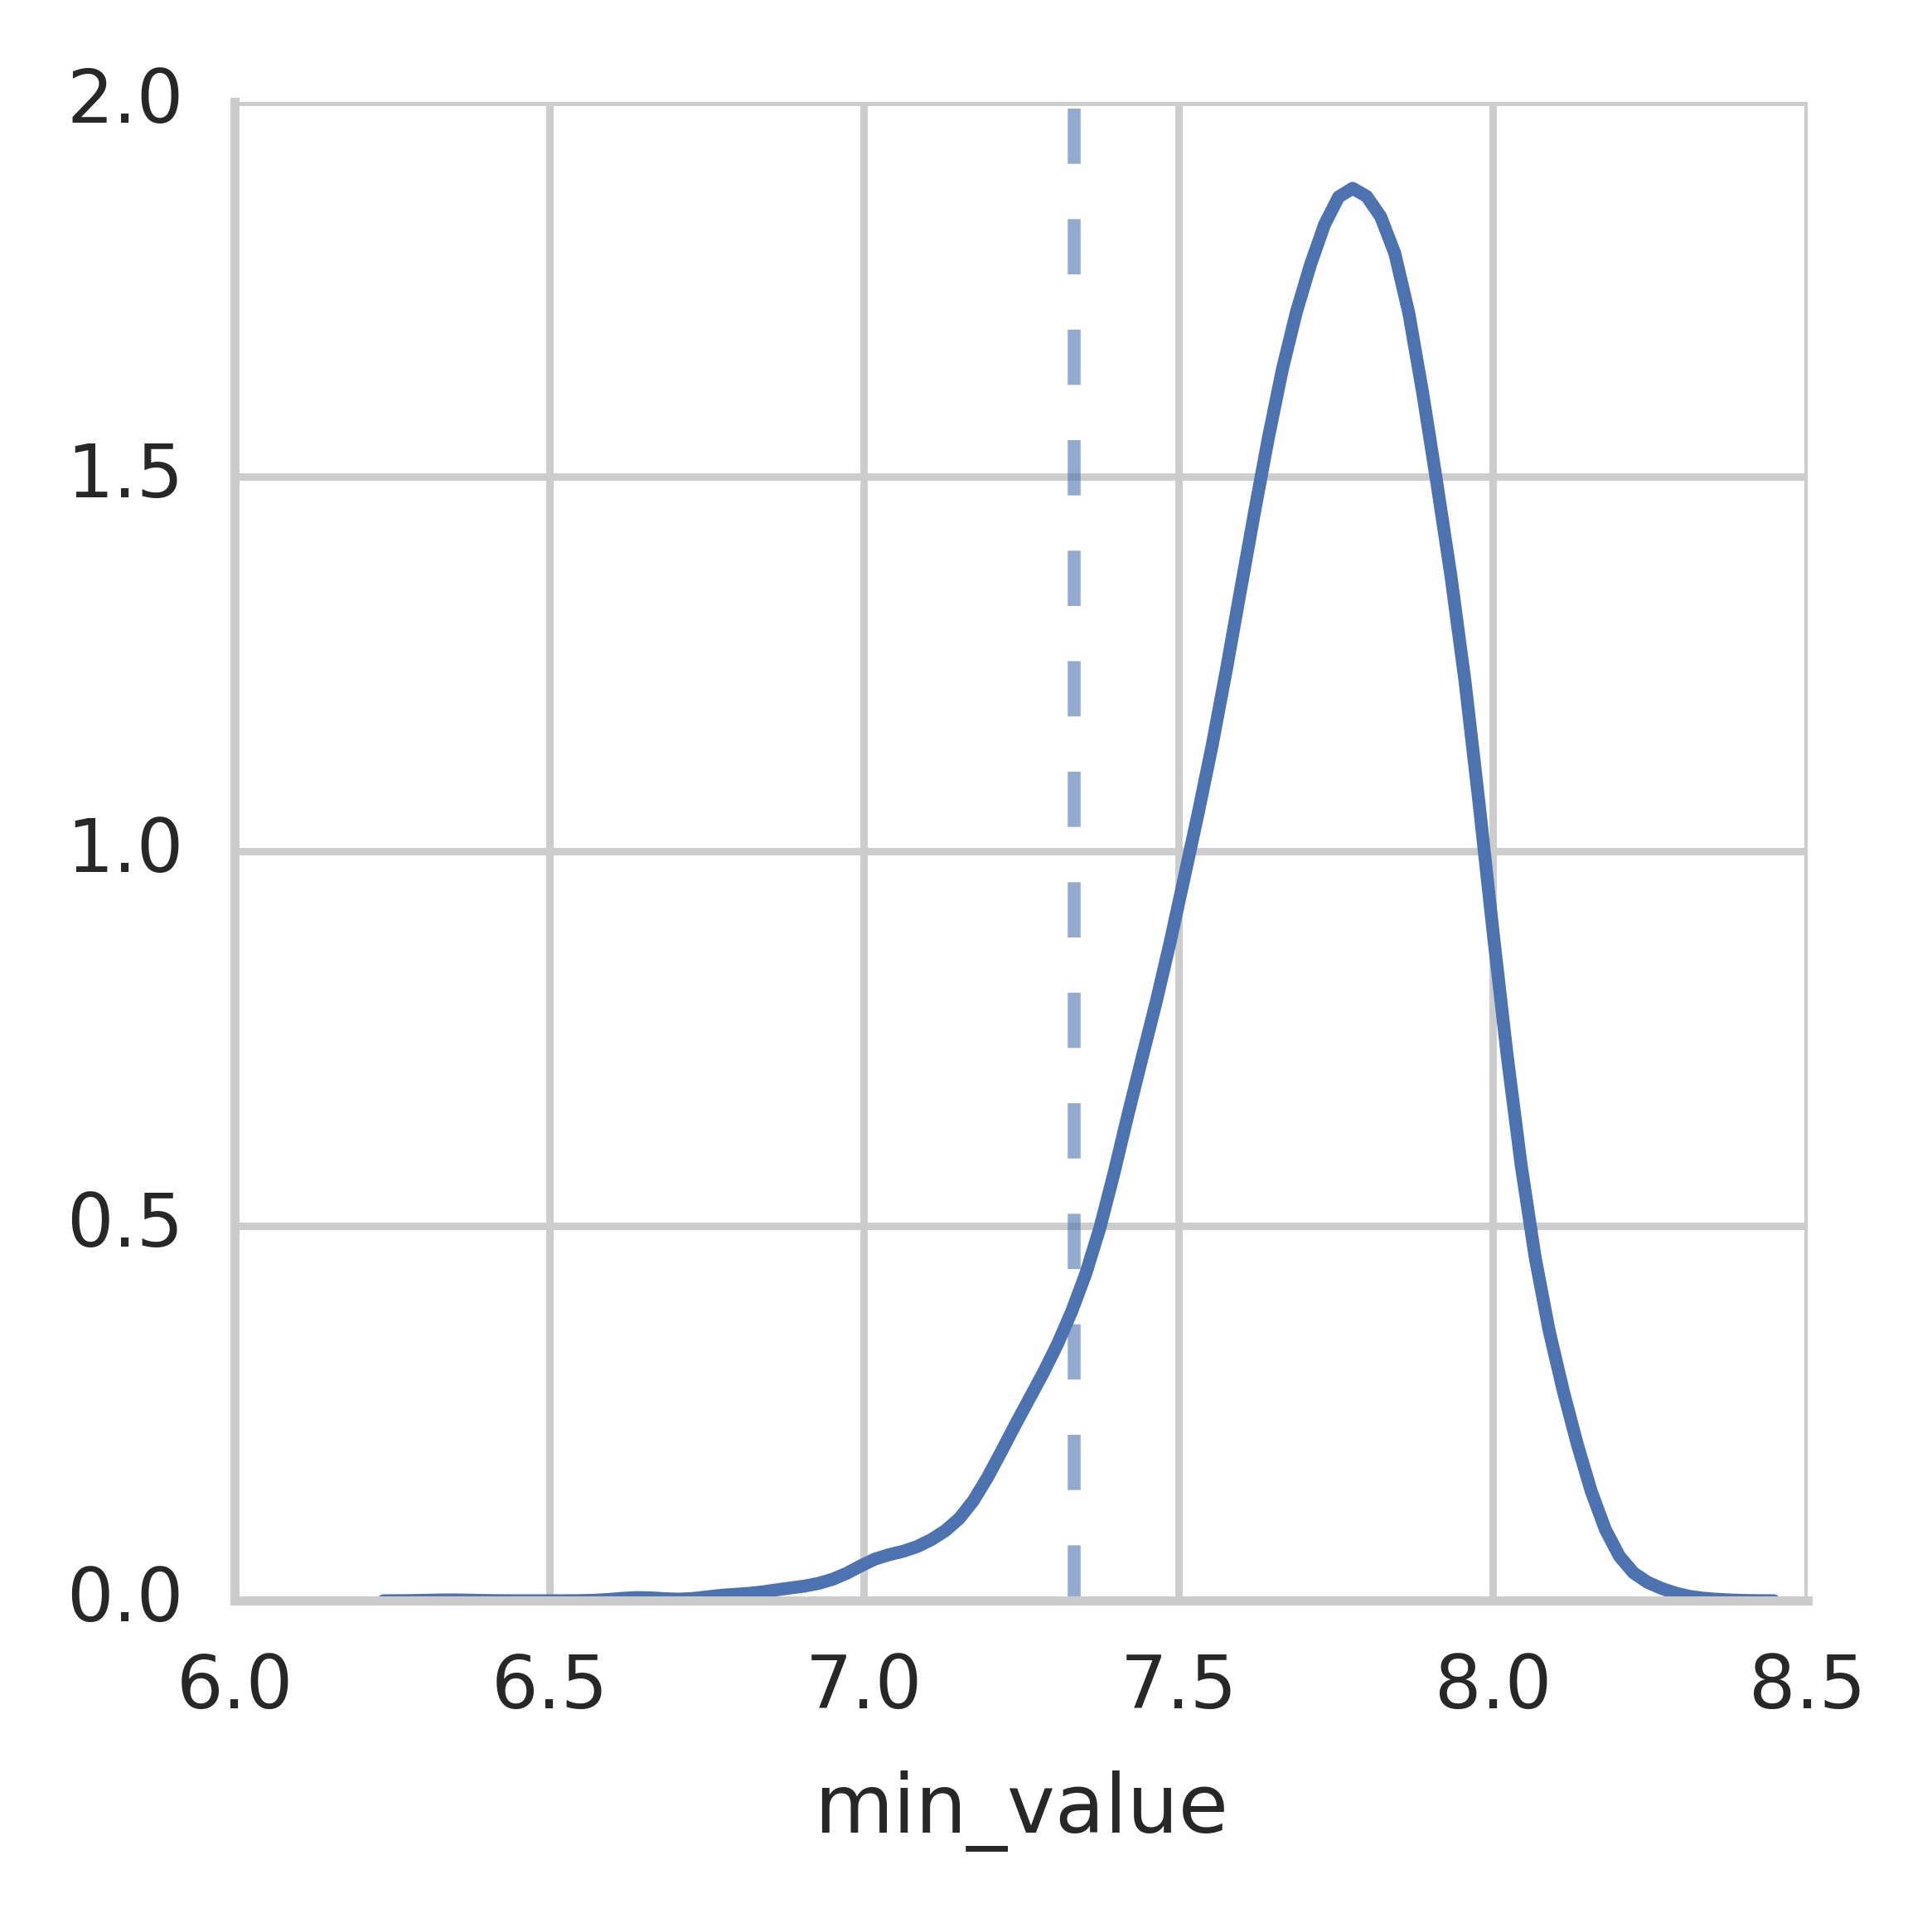

In [114]:
## how close is estimated minimum to the observed minimum?
g = seaborn.FacetGrid(data = grouped_mut_min)
g.map(pyplot.axvline, "y_obs", linestyle = 'dashed', alpha = 0.6)
g.map(seaborn.distplot, "min_value", hist = False)


In [115]:
## how likely are we to have seen a minimum value this extreme?
## this is equal to the proportion of iterations with a value <= the observed min
observed_min = grouped_mut_min.y_obs.min()
prop = numpy.mean(grouped_mut_min.min_value <= observed_min)
min(prop, 1-prop)

0.058900000000000001

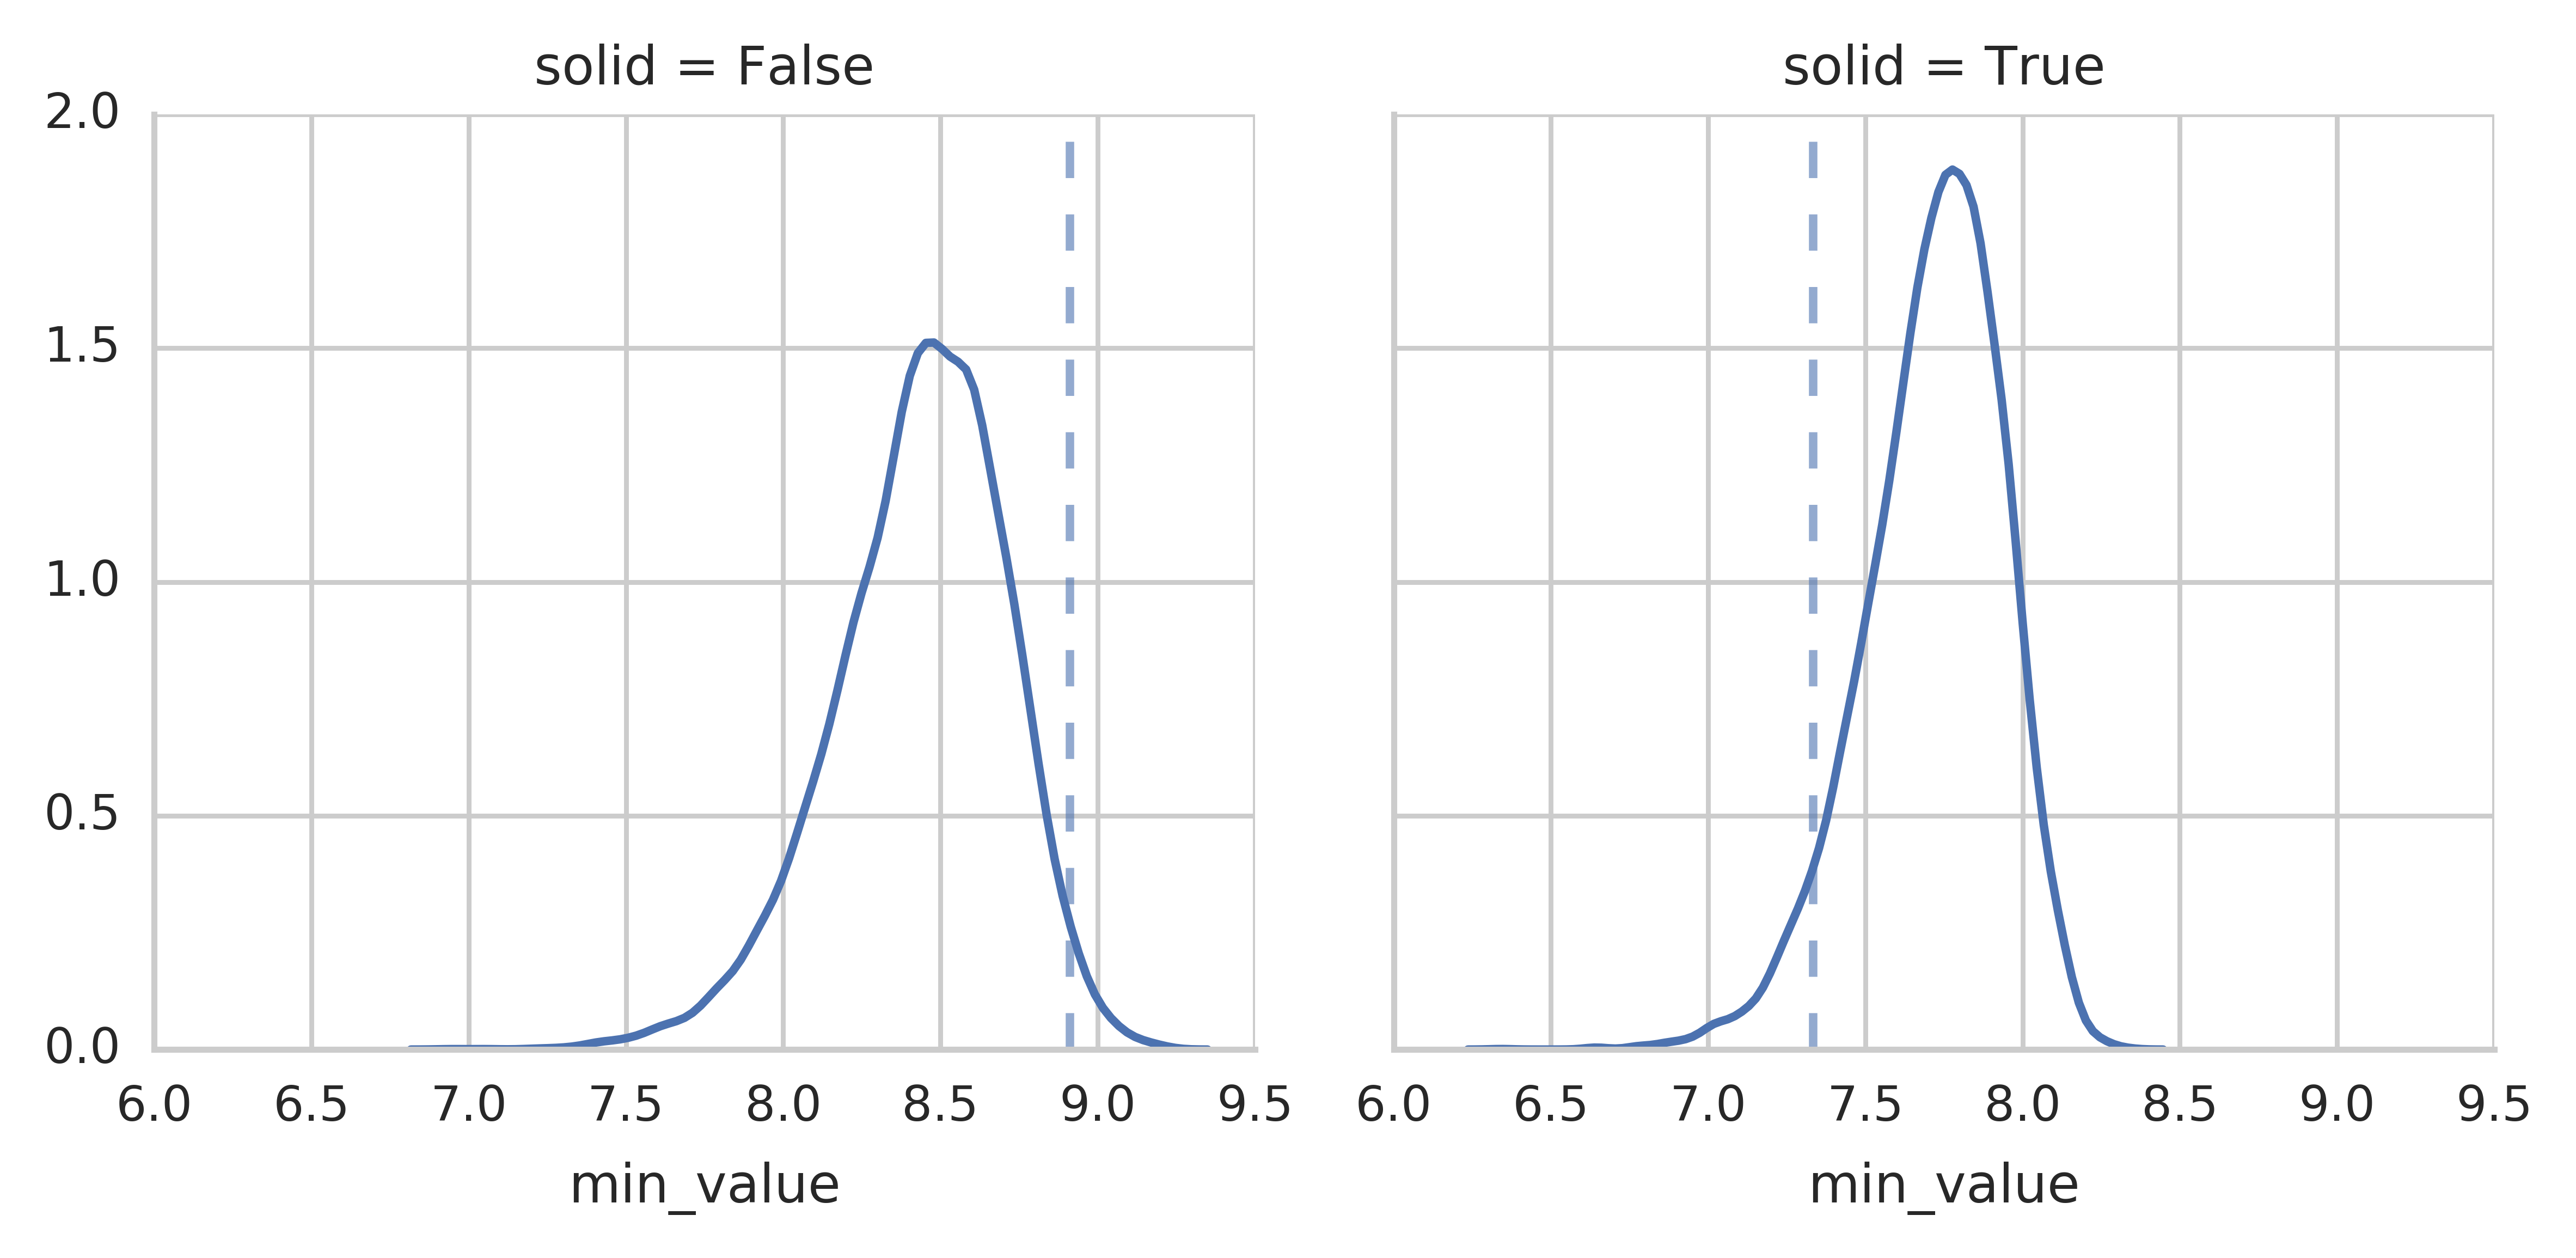

In [116]:
## now, let's repeat by ascites/solid 
g = seaborn.FacetGrid(data = grouped_muttype_min, col = 'solid')
g.map(pyplot.axvline, "y_obs", linestyle = 'dashed', alpha = 0.6)
g.map(seaborn.distplot, "min_value", hist = False)


In [117]:
## how likely are we to have seen a minimum value this extreme?
## this is equal to the proportion of iterations with a value <= the observed min
observed_mins = grouped_muttype_min.groupby('solid').aggregate(numpy.min).rename(columns = {"y_obs": "observed_min"}).observed_min 
prop_below_observed = grouped_muttype_min.set_index('solid').join(observed_mins)
prop_below_observed = prop_below_observed.rename(columns = {'min_value':'estimated_min'})
prop_below_observed = prop_below_observed.reset_index()
prop_below_observed.head()

solid  iter  donor low_cellularity  num_sources_for_donor  \
0  False     0      4           False                      1   
1  False     1      4           False                      1   
2  False     2      4           False                      1   
3  False     3      4           False                      1   
4  False     4      4           False                      1   

  solid and treated             source_id treated     value     y_obs  \
0             False  AOCS-034-13/SP101524   False  8.504950  8.912339   
1             False  AOCS-034-13/SP101524   False  8.686531       NaN   
2             False  AOCS-034-13/SP101524   False  9.070085       NaN   
3             False  AOCS-034-13/SP101524   False  8.305837       NaN   
4             False  AOCS-034-13/SP101524   False  8.234068       NaN   

      y_rep  estimated_min  observed_min  
0  8.504950       8.504950      8.912339  
1  8.686531       8.686531      8.912339  
2  9.070085       9.070085      8.912339  
3  8.305837       8.305837      8.912339  
4  8.234068       8.234068      8.912339

In [118]:
def below_observed(row):
    if row.estimated_min < row.observed_min:
        return 1
    else:
        return 0

prop_below_observed['below_observed'] = prop_below_observed.apply(lambda row: below_observed(row), axis = 1)
prop_below_observed.head()

solid  iter  donor low_cellularity  num_sources_for_donor  \
0  False     0      4           False                      1   
1  False     1      4           False                      1   
2  False     2      4           False                      1   
3  False     3      4           False                      1   
4  False     4      4           False                      1   

  solid and treated             source_id treated     value     y_obs  \
0             False  AOCS-034-13/SP101524   False  8.504950  8.912339   
1             False  AOCS-034-13/SP101524   False  8.686531       NaN   
2             False  AOCS-034-13/SP101524   False  9.070085       NaN   
3             False  AOCS-034-13/SP101524   False  8.305837       NaN   
4             False  AOCS-034-13/SP101524   False  8.234068       NaN   

      y_rep  estimated_min  observed_min  below_observed  
0  8.504950       8.504950      8.912339               1  
1  8.686531       8.686531      8.912339               1  
2  9.070085       9.070085      8.912339               0  
3  8.305837       8.305837      8.912339               1  
4  8.234068       8.234068      8.912339               1

In [119]:
## proportion of observations below / above observed min
 

prop = prop_below_observed.groupby('solid').agg(lambda x: min(numpy.mean(x), numpy.mean(1-x))).below_observed
prop

solid
False    0.0223
True     0.0582
Name: below_observed, dtype: float64

#### pp-checks by number of sources

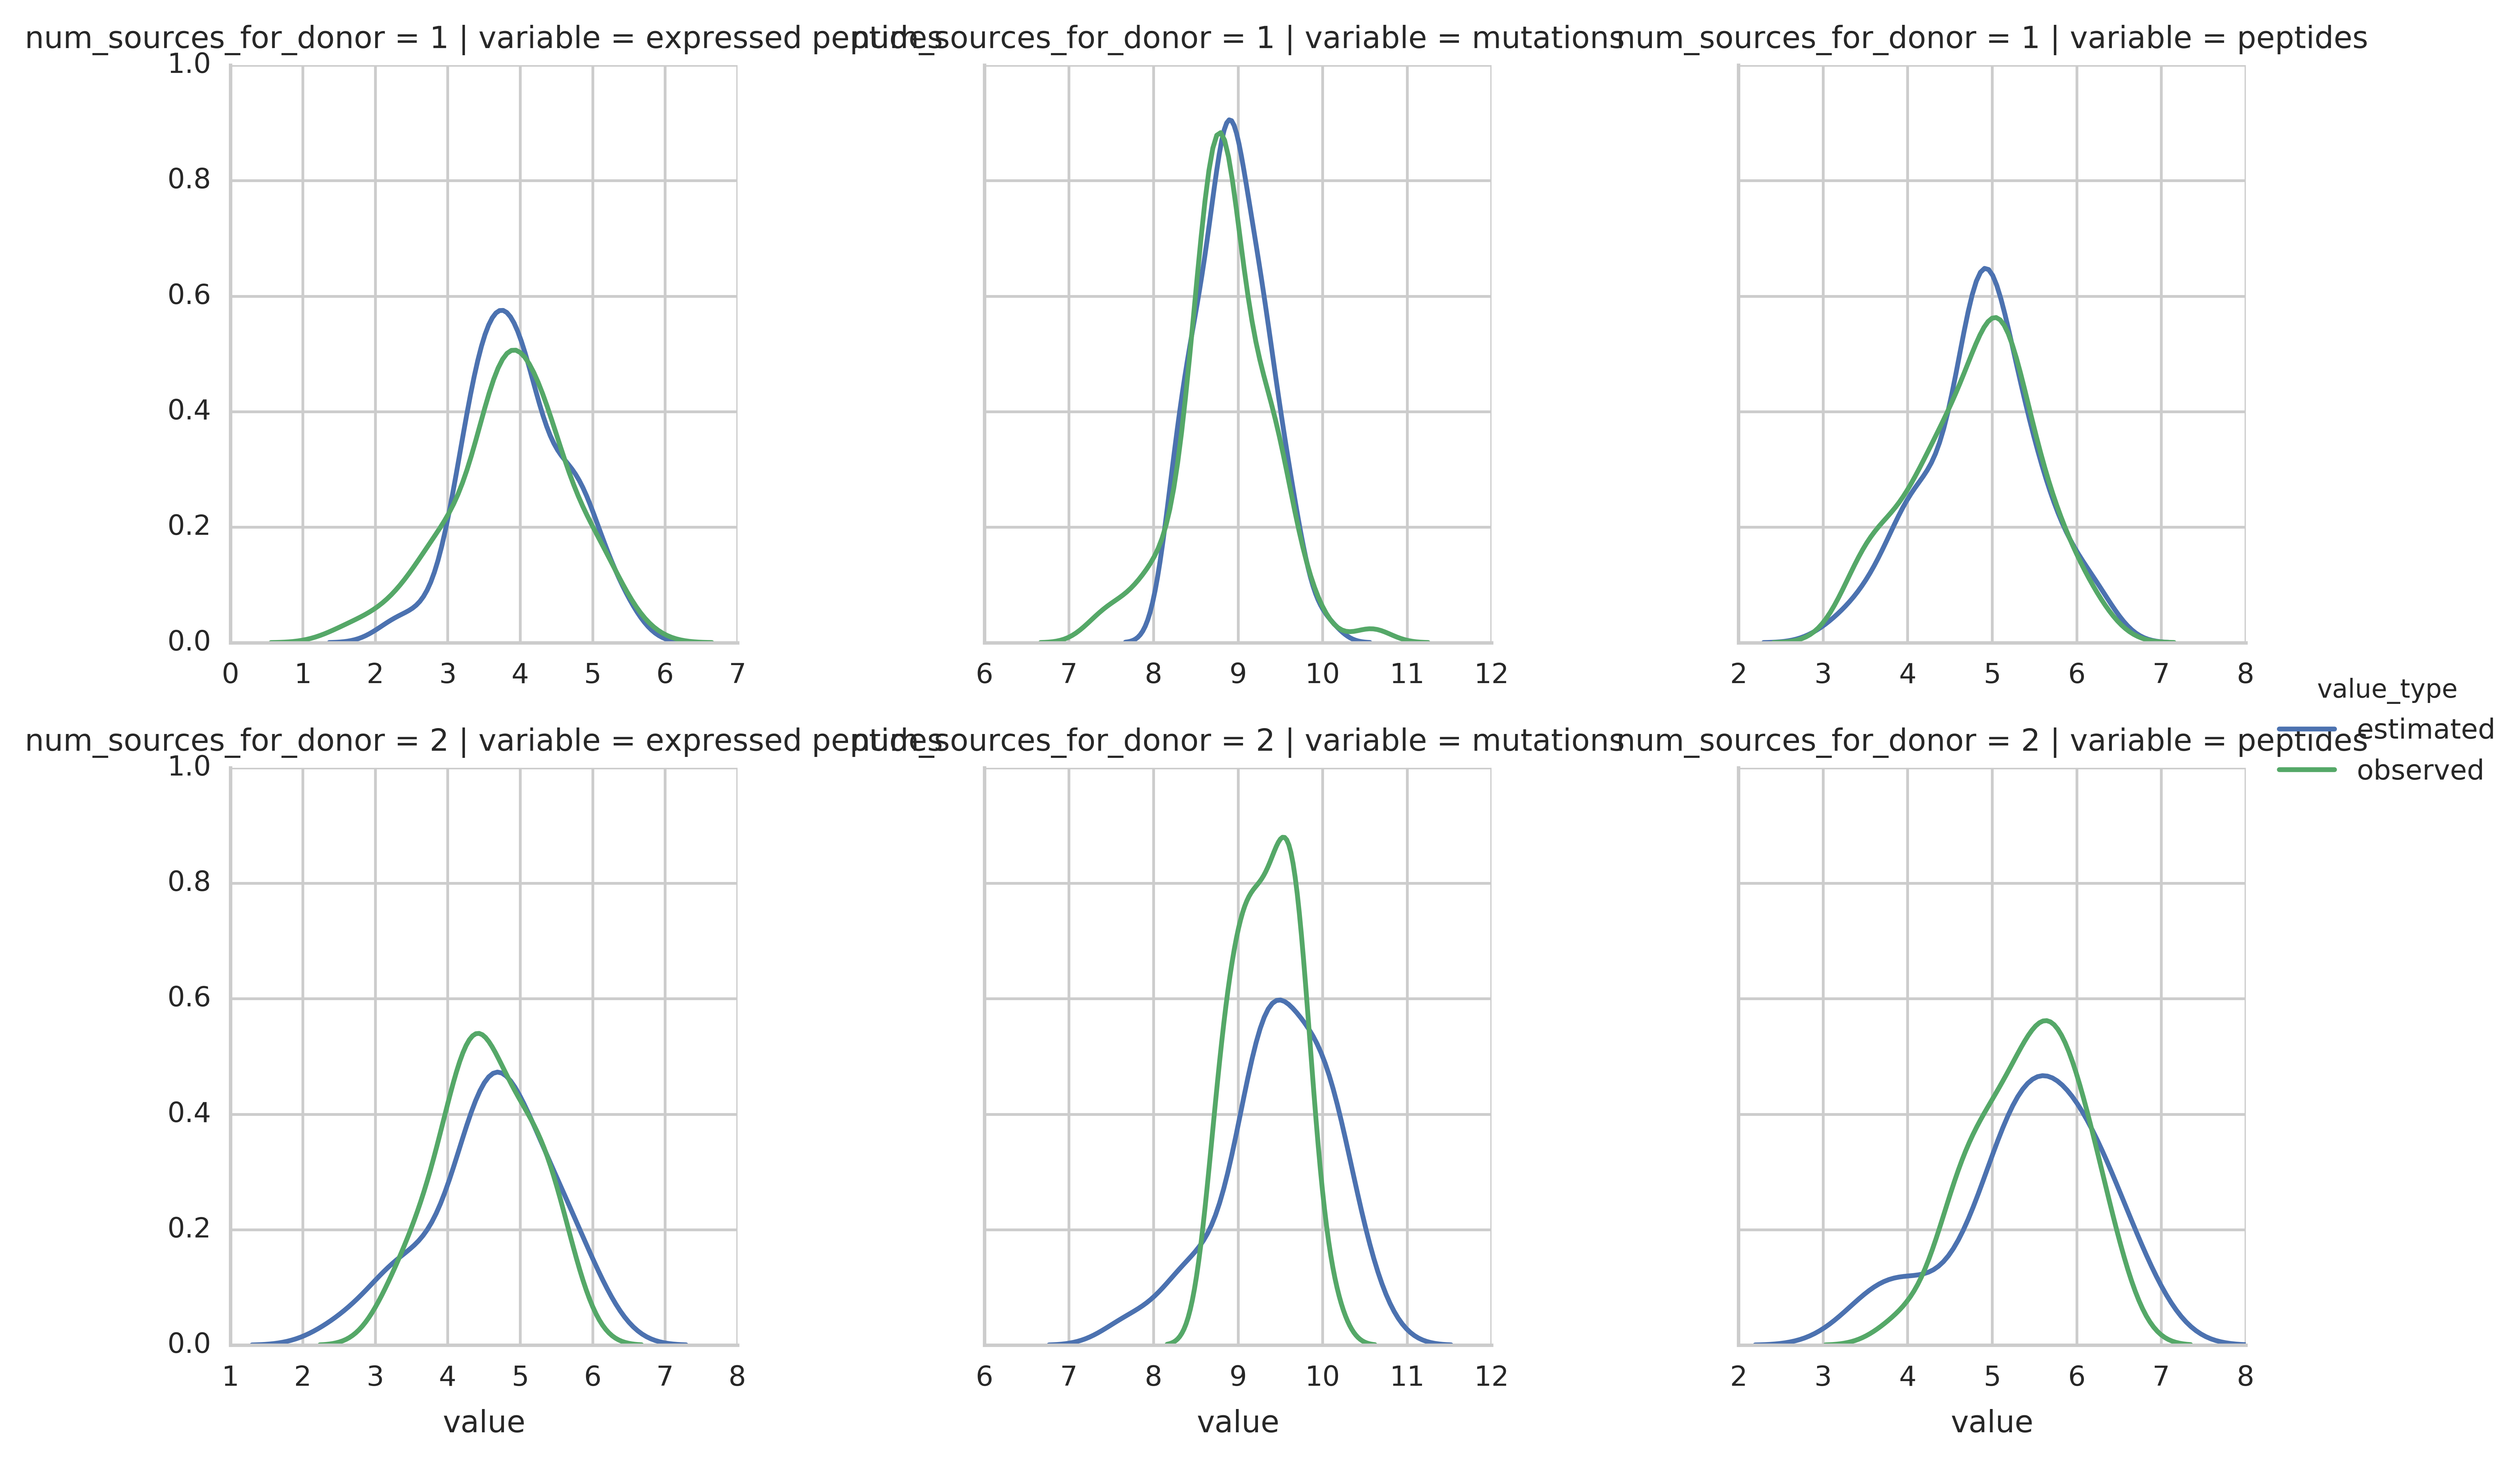

In [120]:
## plot by number of sources
g = seaborn.FacetGrid(select_random_iter(plot_ppd.query('num_sources_for_donor <= 2')),
                      col="variable",
                      row="num_sources_for_donor", 
                      hue="value_type",
                      sharex=False,
                     )
g.map(seaborn.distplot, "value", hist = False)
g.add_legend()

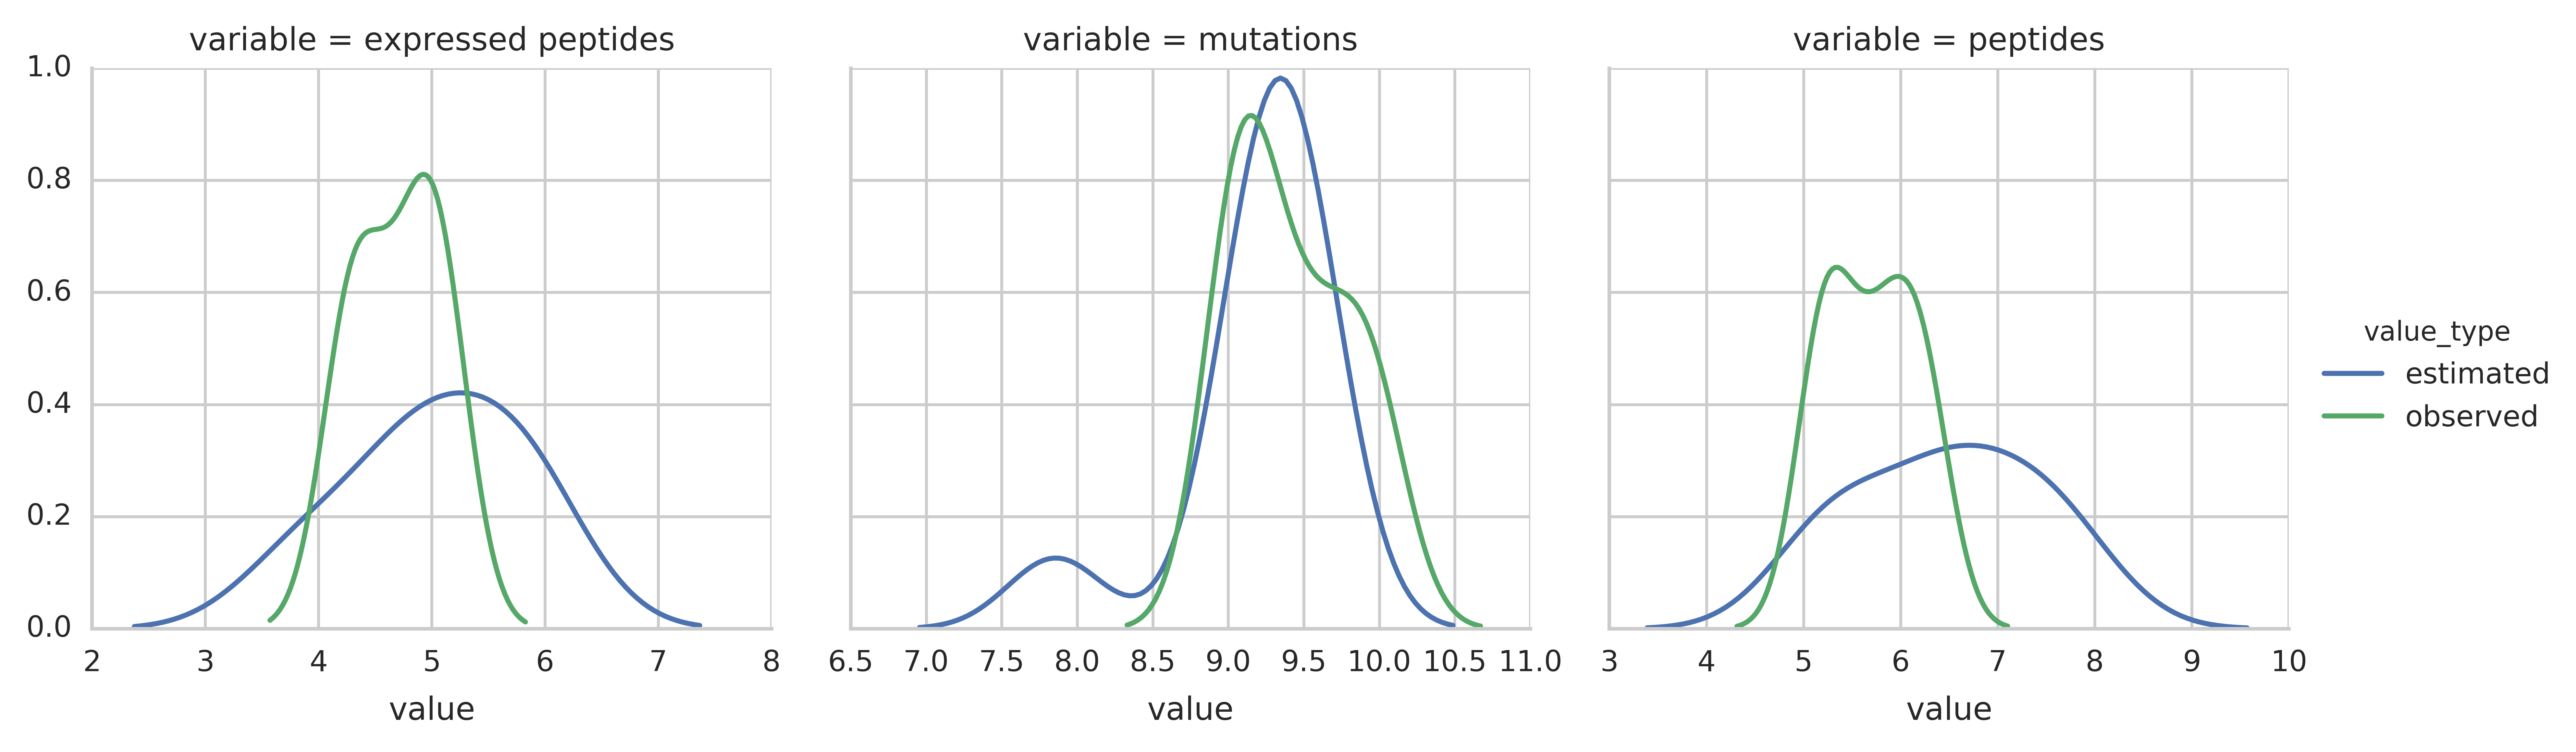

In [121]:
## plot among donors with 3-4 sources per donor
g = seaborn.FacetGrid(select_random_iter(plot_ppd.query('num_sources_for_donor > 2')),
                      col="variable",
                      hue="value_type", 
                      sharex=False,)
g.map(seaborn.distplot, "value", hist = False)
g.add_legend()

#### pp-checks by treated vs untreated

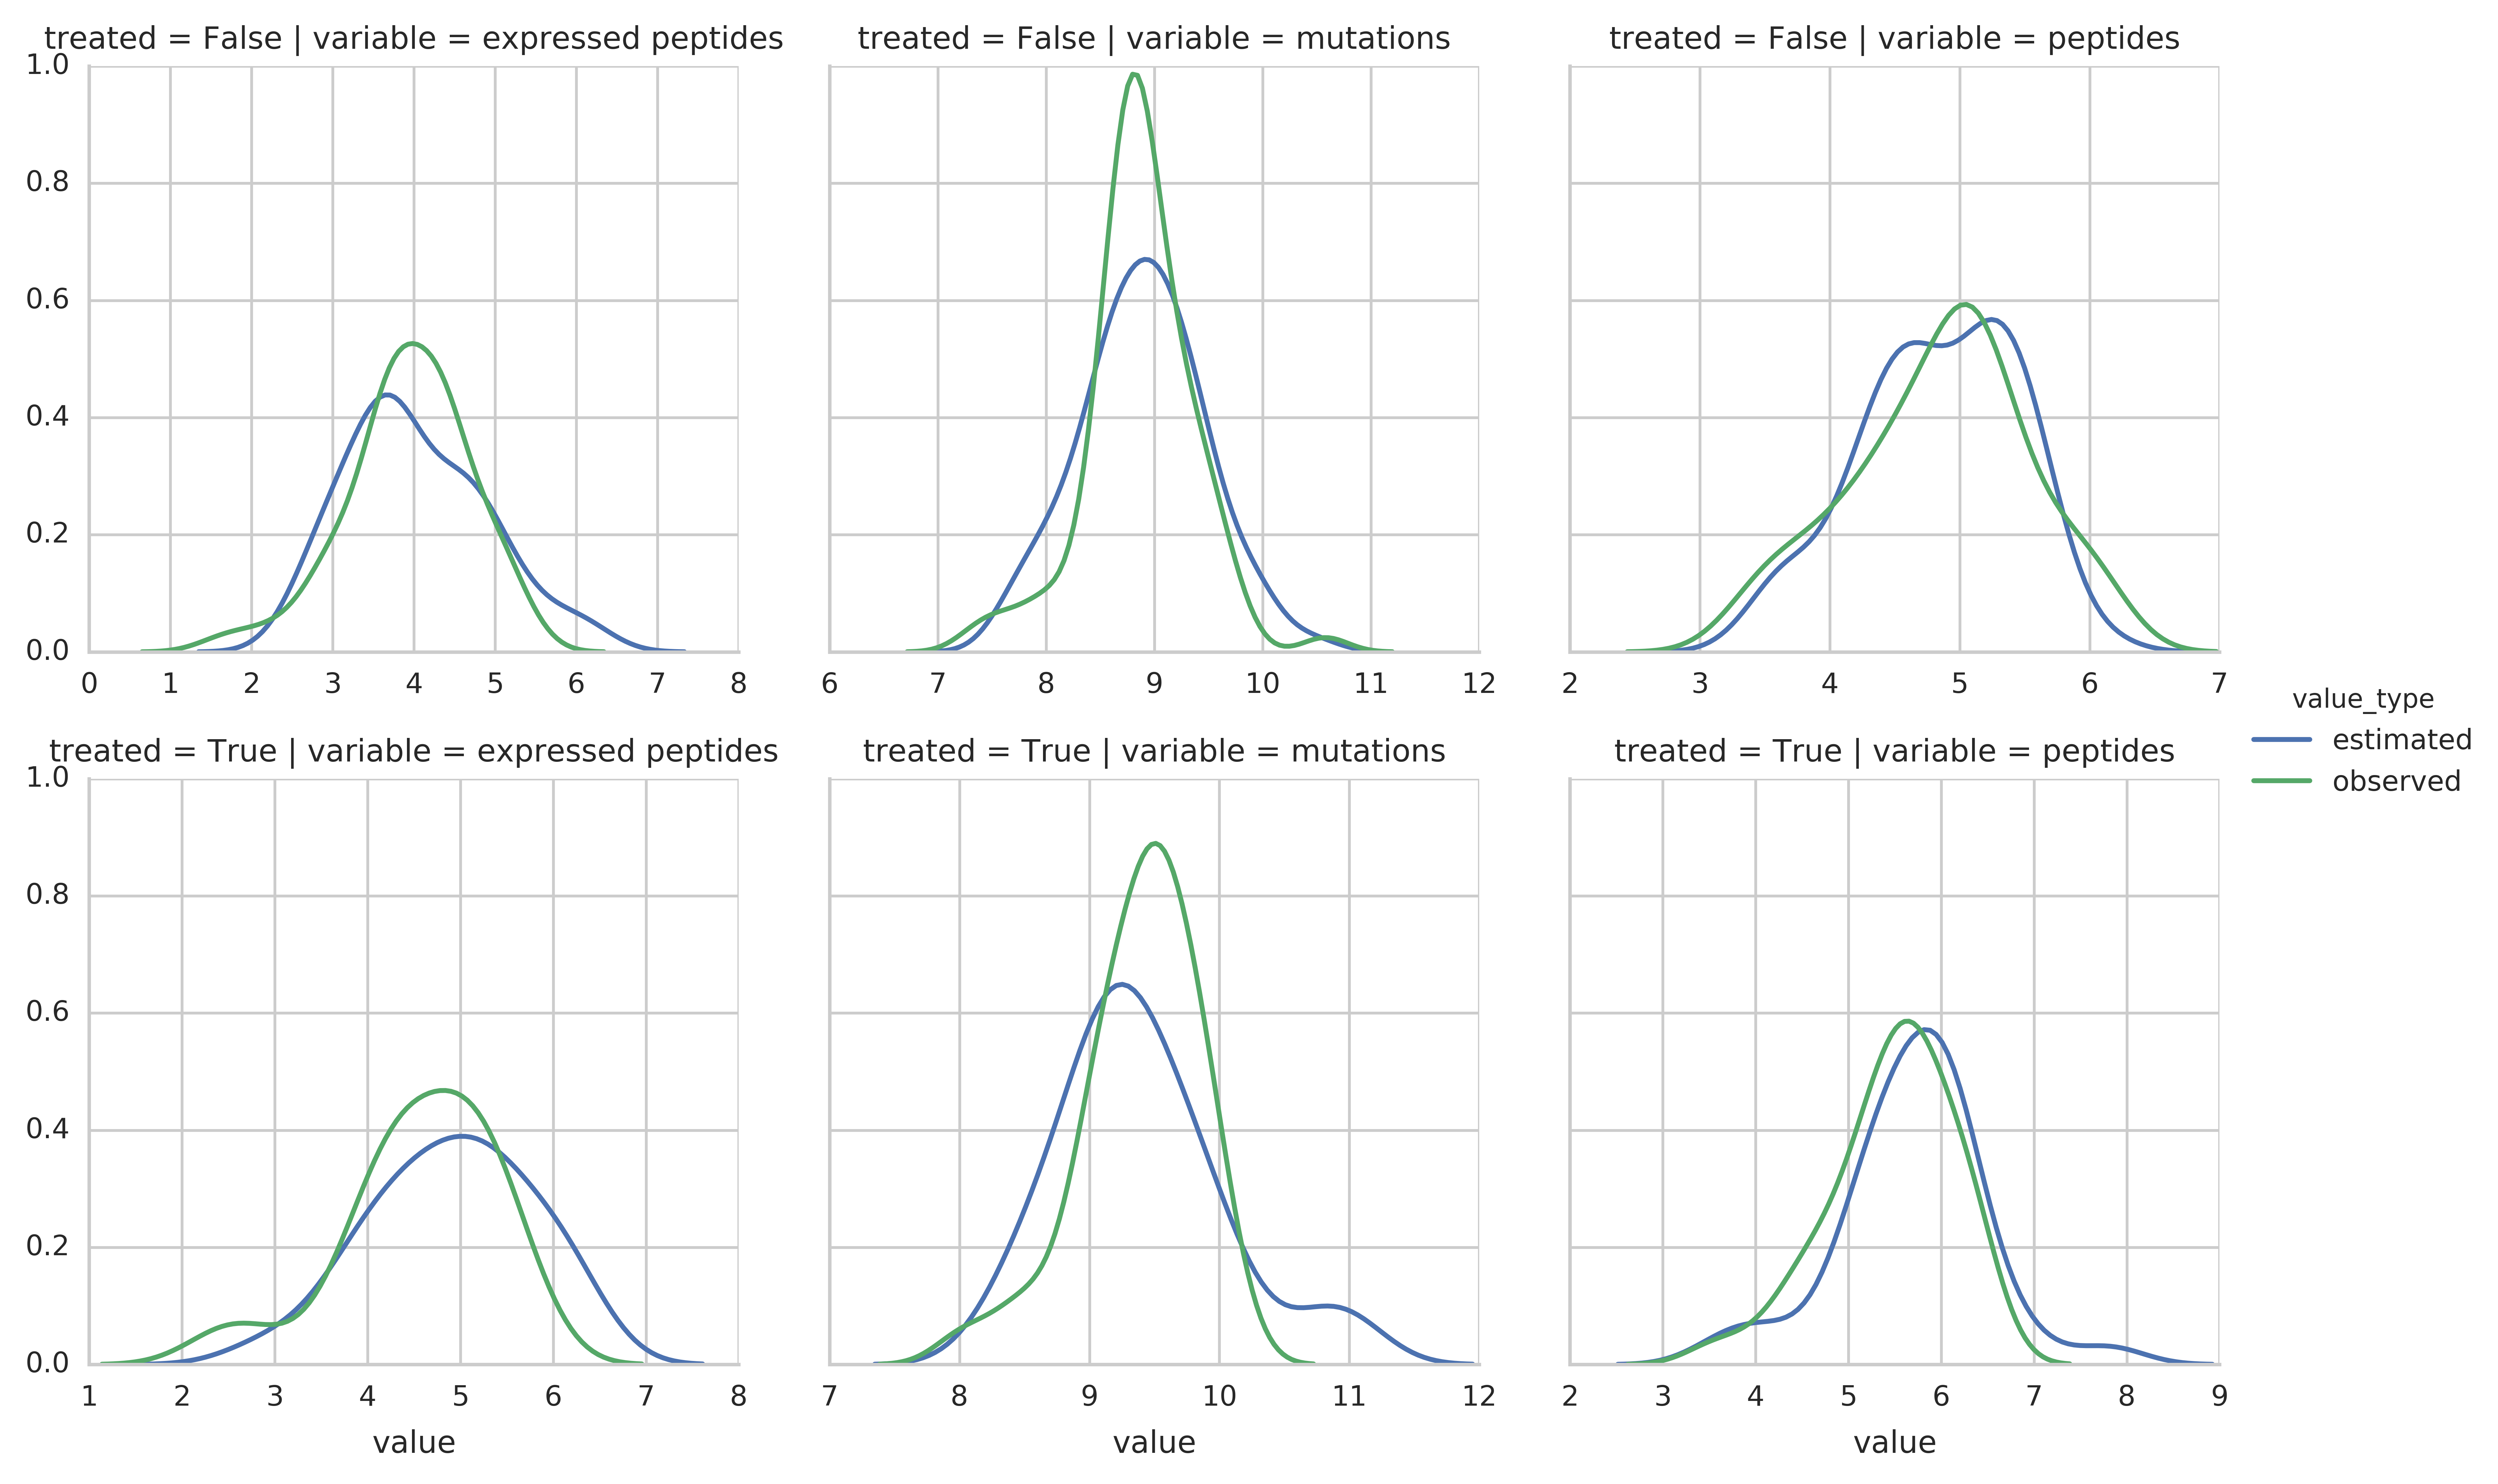

In [122]:
## plot by treated / untreated
g = seaborn.FacetGrid(select_random_iter(plot_ppd), 
                      col="variable", 
                      row='treated',
                      hue="value_type",
                      sharex=False,
                     )
g.map(seaborn.distplot, "value", hist = False)
g.add_legend()

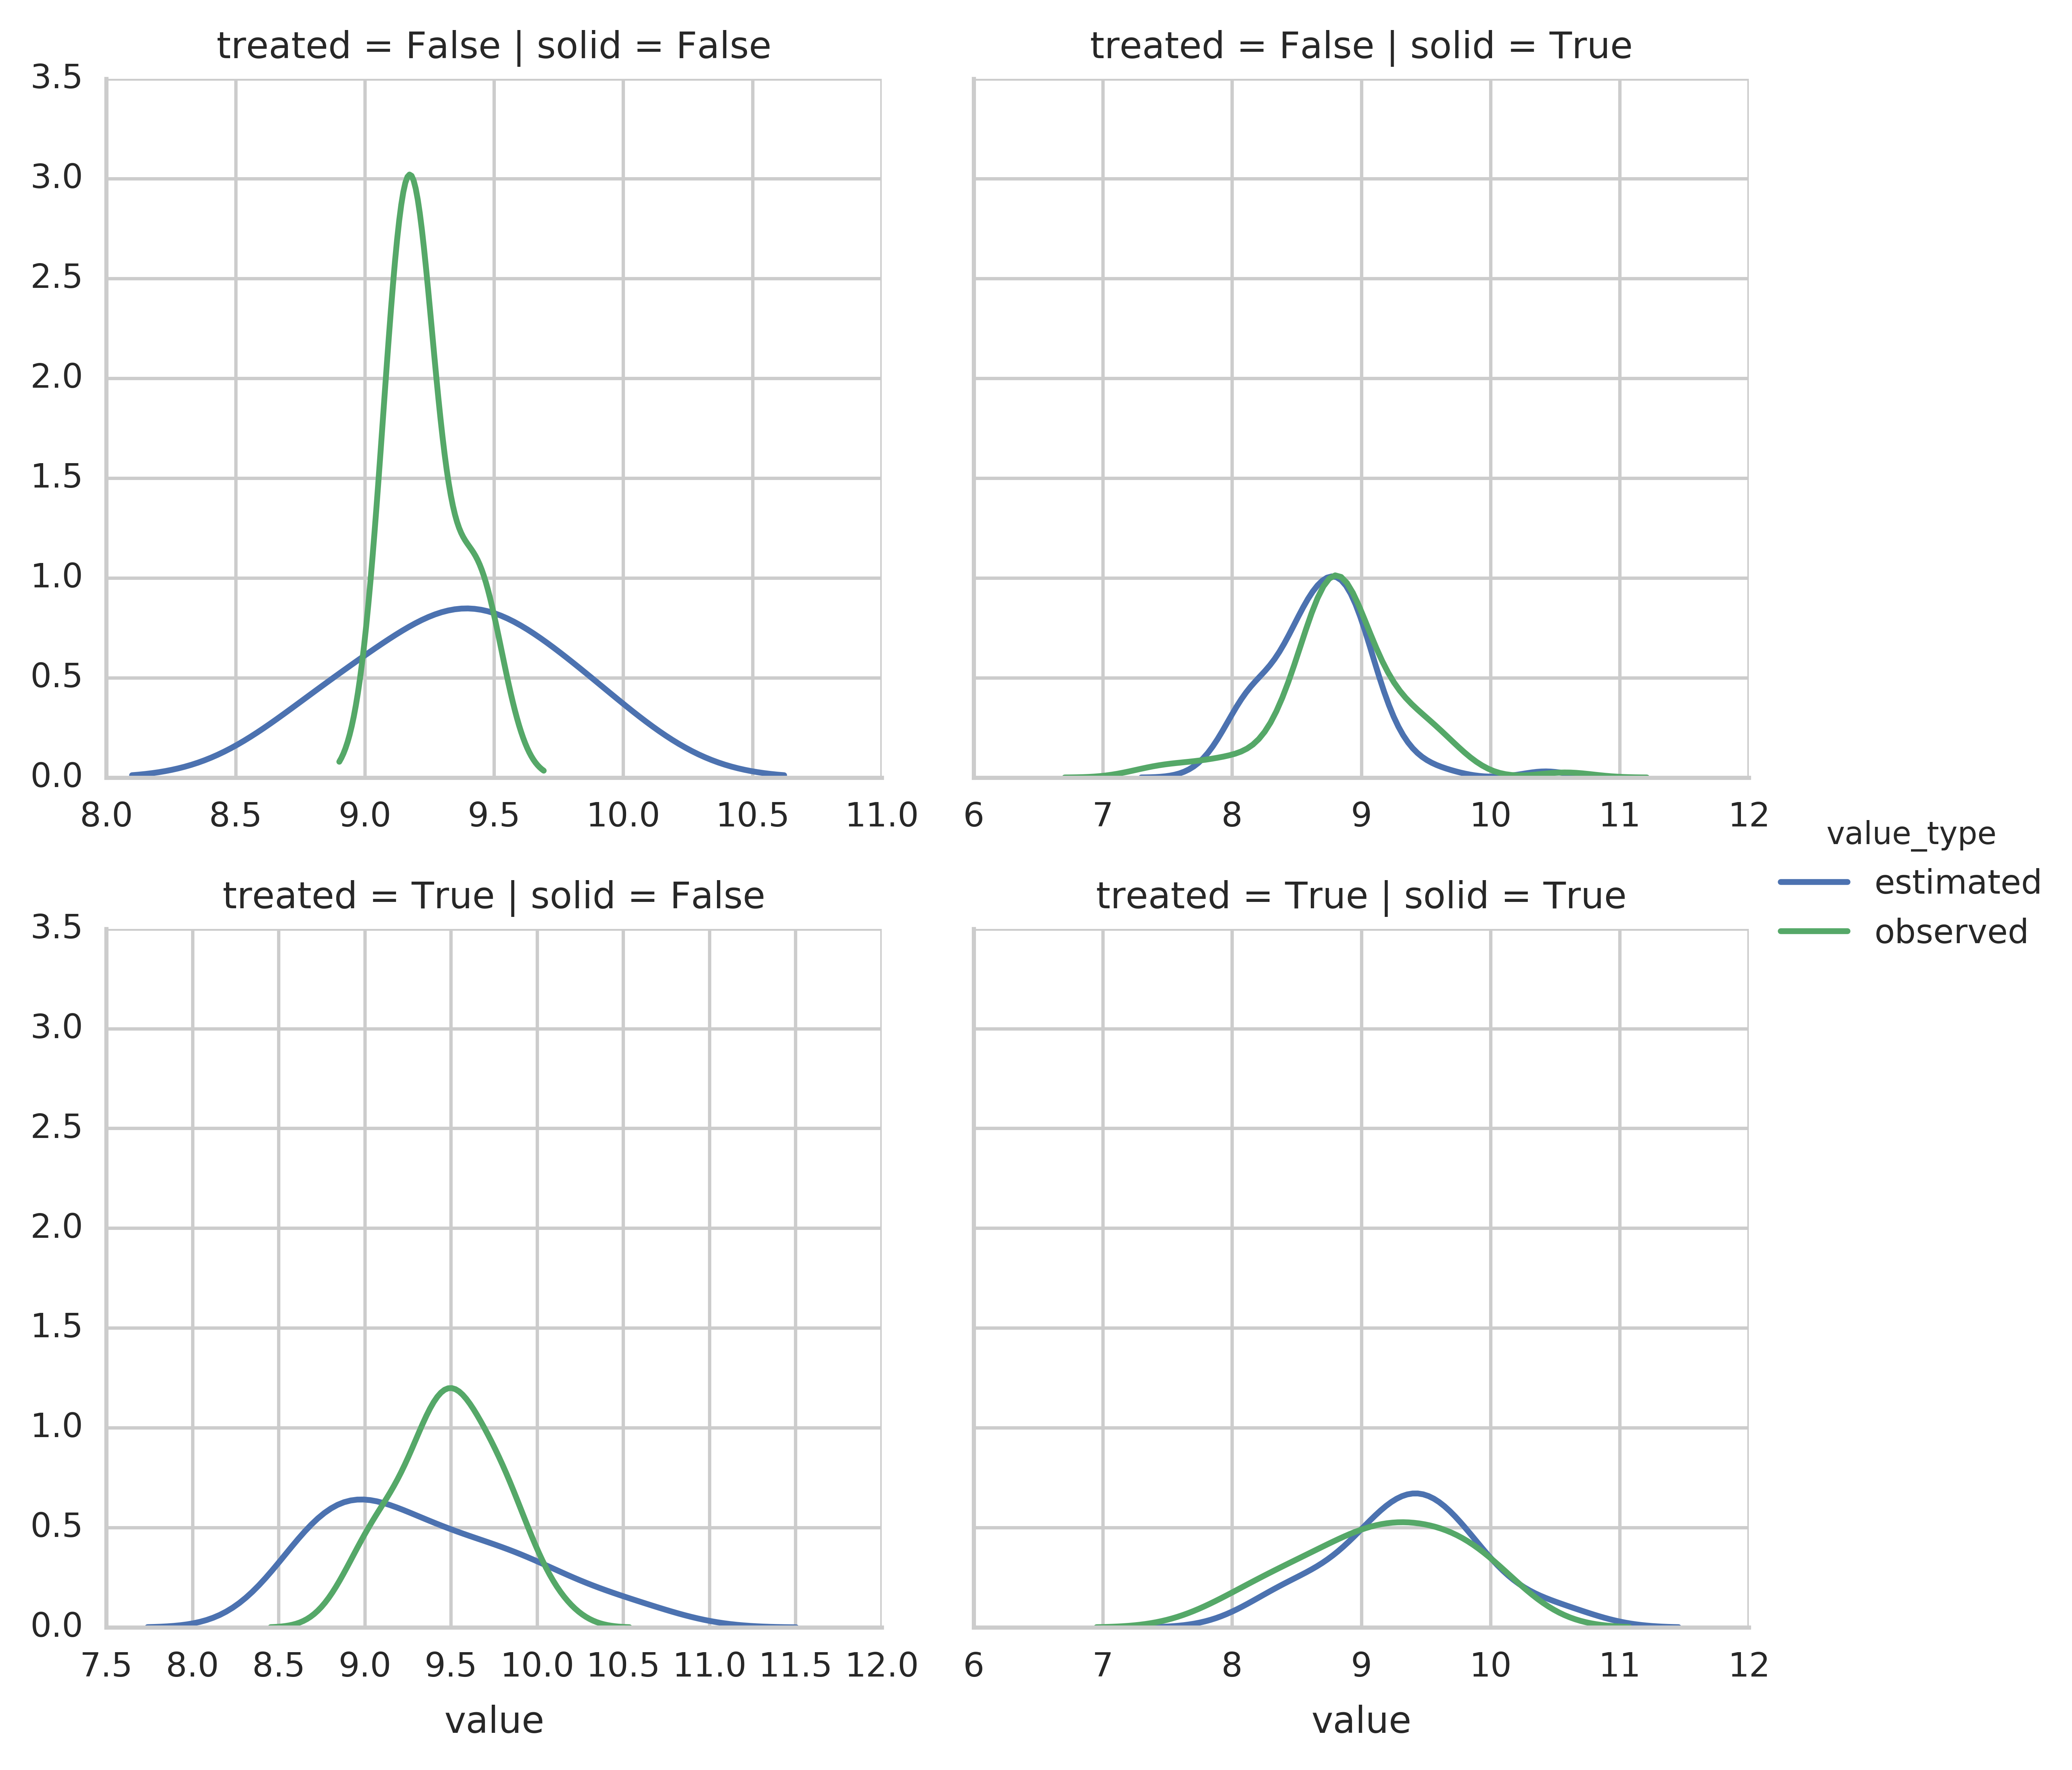

In [123]:
## plot by treated / untreated by solid/ascites, looking only at number of mutations
## granted, we know some of these have small sample sizes .. 
g = seaborn.FacetGrid(select_random_iter(plot_ppd.query('variable == "mutations"')), 
                      col="solid", 
                      row='treated',
                      hue="value_type",
                      sharex=False,
                     )
g.map(seaborn.distplot, "value", hist = False)
g.add_legend()

#### pp-checks by source_id, among donors with many samples

In [124]:
g = seaborn.FacetGrid(data = tempd.sort_values(by = ['donor','treated']),
                      col = 'source_id', col_wrap = 6,
                      sharex = False, hue = 'treated'
                     )
g.map(seaborn.distplot, "y_rep", hist = False)
g.map(pyplot.axvline, "y_obs", alpha = 0.8, linestyle='dashed')
g.add_legend()

NameError: name 'tempd' is not defined

#### pp-check on distribution of donor means

In [ ]:
seaborn.distplot(fit_results['mutations'].extract()['donor_mean'].mean(0))

In [ ]:
y_label = 'mutations'
fit = fit_results[y_label]

In [ ]:
fit_res = pandas.DataFrame(extracted['donor_mean'])
fit_res.index.name = 'iter'
fit_res = pandas.DataFrame(fit_res.stack())
fit_res.reset_index(0, inplace = True)
fit_res.columns = ['iter','value']
fit_res['variable'] = y_label
fit_res['value_type'] = 'estimated_donor_mean'
fit_res.reset_index(0, inplace = True)
fit_res.index.name = 'donor'
fit_res.head()

In [ ]:
## prep data 
all_donor_means = []
for (y_label, fit) in fit_results.items():
    extracted = fit.extract()
    
    # extract & reshape posterior predicted distribution (y-reps)
    fit_res = pandas.DataFrame(extracted['donor_mean'])
    fit_res.index.name = 'iter'
    fit_res = pandas.DataFrame(fit_res.stack())
    fit_res.reset_index(0, inplace = True)
    fit_res.columns = ['iter','value']
    fit_res['variable'] = y_label
    fit_res['value_type'] = 'estimated donor mean'
    fit_res.reset_index(0, inplace = True)
    fit_res.index.name = 'donor'
    fit_res.reset_index(0, inplace = True)
    
    ## append to data prepped earlier
    all_donor_means.append(fit_res)

all_donor_means = pandas.concat(all_donor_means, ignore_index=True)
#all_donor_means.index = all_donor_means.donor
#all_donor_means = all_donor_means.drop('source_id', axis = 1)
all_donor_means = all_donor_means.drop('donor', axis = 1).rename(columns = {'index': 'donor'})
all_donor_means = all_donor_means.set_index('donor')
all_donor_means.head()

In [ ]:
## join with clinical data

clin_data_donors = clin_data.groupby('donor').max()
clin_data_donors['multiple_sources'] = clin_data_donors.num_sources_for_donor > 1
clin_data_donors['several_sources'] = clin_data_donors.num_sources_for_donor > 2
clin_data_donors.head()


In [ ]:
donor_ppd_data = all_donor_means.join(clin_data_donors)
donor_ppd_data.head()

In [ ]:
g = seaborn.FacetGrid(data = select_random_iter(donor_ppd_data),
                      hue = 'several_sources',
                      col = 'variable',
                      sharex = False
                     )
g.map(seaborn.distplot, "value", hist = False)
g.add_legend()

### modified model code to test sensitivity to variance 

In [ ]:
# stan model
model2 = """
data {
    // Data sizes
    int<lower=0> num_sources;
    int<lower=0> num_predictors;
    int<lower=0> num_donors;

    // Data
    vector[num_predictors] predictors[num_sources];
    int<lower=0> donors[num_sources];
    real y[num_sources];  // predicted variable
    int<lower=1> num_sources_for_donor[num_sources];
    int<lower=0, upper=1> solid[num_sources];
}
parameters {
    real global_mean;
    real<lower=0> donor_sigma;
    real<lower=0> solid_sigma;
    real<lower=0> ascites_sigma;
    real<lower=0> sample_sigma;
    vector[num_donors] donor_mean;
    vector[num_predictors] predictor_coefficients;
}
transformed parameters {
    real lp;
    real mu[num_sources];
    
    for (i in 1:num_sources) {
        lp <- dot_product(predictors[i], predictor_coefficients);
        if (num_sources_for_donor[i] > 1) {
            mu[i] <- donor_mean[donors[i]] + lp;
        } else {
            mu[i] <- global_mean + lp;
        }
    }
}
model {
    global_mean ~ normal(0, 100);
    donor_sigma ~ cauchy(0, 2);
    sample_sigma ~ cauchy(0, 2);
    solid_sigma ~ normal(sample_sigma, 1);
    ascites_sigma ~ normal(sample_sigma, 1);
    donor_mean ~ normal(global_mean, donor_sigma);
    predictor_coefficients ~ normal(0, 20);
    for (i in 1:num_sources) {
        if (solid[i]==1) {
            y[i] ~ normal(mu[i], solid_sigma);
        } else {
            y[i] ~ normal(mu[i], ascites_sigma);
        }
    }
}
generated quantities {
    real y_rep[num_sources];
    real log_lik[num_sources];
    
    for (i in 1:num_sources) {
        if (solid[i]==1) {
            y_rep[i] <- normal_rng(mu[i], solid_sigma);
            log_lik[i] <- normal_log(y[i], mu[i], solid_sigma);
        } else {
            y_rep[i] <- normal_rng(mu[i], ascites_sigma);
            log_lik[i] <- normal_log(y[i], mu[i], solid_sigma);
        }
    }
}
""".strip()

data = {    

}
def init(data):
    return {
        'global_mean': numpy.random.normal(0, .1),
        'donor_sigma': numpy.random.normal(1, .1),
        'sample_sigma': numpy.random.normal(1, .1),
        'solid_sigma': numpy.random.normal(1, .1),
        'ascites_sigma': numpy.random.normal(1, .1),
        'donor_mean': numpy.zeros(data['num_donors']),
        'predictor_coefficients': numpy.random.normal(0, .1, size=(data['num_predictors'],)),
    }

for (i, line) in enumerate(model1.split("\n")):
    print("%3d %s" % (i + 1, line))

def print_dict(d):
    for key in [key for key in d if not isinstance(d[key], numpy.ndarray)]:
        print("%s: %s" % (key, d[key]))
    for key in [key for key in d if isinstance(d[key], numpy.ndarray)]:
        print("%s: %s mean=%s std=%s" % (key,  d[key].shape, d[key].mean(), d[key].std()))

fit_results2 = {}
for (y_label, raw_data) in data_by_predicted.items():
    print("+" * 40)
    print("RUNNING MODEL FOR: %s" % y_label)
    df_x = raw_data[[x for x in list(raw_data.columns) if x not in ("y", "donor")]].astype(float)
    data = {
        'num_sources': len(raw_data.index),
        'num_predictors': len(df_x.columns),
        'num_donors': raw_data.donor.nunique(),

        'predictors': df_x.values.astype(float),
        'donors': raw_data.donor.values + 1,  # convert to 1-indexed
        'num_sources_for_donor': raw_data.num_sources_for_donor.values,
        'solid': raw_data.solid.values.astype(int),
        'y': raw_data.y.values,
    }
    print("")
    print("*" * 40)
    print("DATA")
    print_dict(data)
    print("")

    print("*" * 40)
    print("INITIAL VALUES")
    print_dict(init(data))
    sys.stdout.flush()
    
    fit_results2[y_label] = stanity.fit(model_code=model2, data=data, init=lambda: init(data), iter=10000, chains=2)
    print("Done with fit.")
print("DONE")


In [ ]:
## inspect solid & ascites sigma values
extracted = fit_results2['mutations']
fit_scalars = pandas.DataFrame(
    dict((field, extracted[field])
         for field in ["donor_sigma", "solid_sigma", "ascites_sigma"]))
seaborn.violinplot(fit_scalars, orient="h")

#### check coefficient estimates using this model

In [ ]:
all_fit_coefficients2 = []
for (y_label, fit) in fit_results2.items():
    extracted = fit.extract()
    fit_coefficients = pandas.DataFrame(numpy.exp(extracted['predictor_coefficients']),
                           columns=list(data_by_predicted[y_label].columns)[2:])
    fit_coefficients["y_label"] = y_label
    all_fit_coefficients2.append(fit_coefficients)
all_fit_coefficients2 = pandas.concat(all_fit_coefficients2, ignore_index=True)
all_fit_coefficients2.head()

In [ ]:
melted2 = pandas.melt(all_fit_coefficients2, id_vars=["y_label"])

In [ ]:
nice_melted2 = melted2.copy()
nice_melted2.variable = nice_melted2.variable.map(lambda x: {
        "low_cellularity": "low purity",
        "num_sources_for_donor": "donor sample count"
}.get(x, x))
renames = {
    'treated': 'treated vs. untreated',
    'solid': 'solid vs. ascites tumor',
    'low purity': 'low vs. high purity',
    'solid and treated': 'interaction:\nsolid tumor + treated',
    'donor sample count': 'donor sample count',
}
nice_melted2.variable = nice_melted2.variable.map(renames)

seaborn.set_context('paper')
seaborn.set_style("whitegrid")
seaborn.boxplot(
    data=nice_melted2,
    y='variable',
    x='value',
    hue='y_label',
    order=[renames.get(x, x) for x in ["treated", "solid", "low purity", "solid and treated", "donor sample count"]],
    hue_order=["mutations", "peptides", "expressed peptides"],
    whis=[5, 95],
    orient='h',
    showbox=True,
    showfliers=False,
#    meanline=True,
#    showmeans=True
)
pyplot.xlim(xmin=0,xmax=4)
pyplot.ylabel("")
pyplot.xlabel("Fold change")
pyplot.legend(title=None, loc='lower right')
pyplot.axvline(1.0, color="black")
pyplot.tight_layout()
#pyplot.savefig("../figures/bayesian_model_effects.pdf")

In [ ]:
## compare coefficient estimates under m1 & m2
nice_melted['model'] = 'model1'
nice_melted2['model'] = 'model2'
nice_melted_compare = pandas.concat([nice_melted, nice_melted2])
nice_melted_compare.head()

In [ ]:
## mutation count
seaborn.set_context('paper')
seaborn.set_style("whitegrid")
seaborn.boxplot(
    data=nice_melted_compare.query('y_label == "mutations"'),
    y='variable',
    x='value',
    hue='model',
    order=[renames.get(x, x) for x in ["treated", "solid", "low purity", "solid and treated", "donor sample count"]],
    hue_order=["model1", "model2"],
    whis=[5, 95],
    orient='h',
    showbox=True,
    showfliers=False,
#    meanline=True,
#    showmeans=True
)
pyplot.xlim(xmin=0,xmax=4)
pyplot.ylabel("")
pyplot.xlabel("Fold change")
pyplot.legend(title=None, loc='lower right')
pyplot.axvline(1.0, color="black")
pyplot.tight_layout()

In [ ]:
## peptide count
seaborn.set_context('paper')
seaborn.set_style("whitegrid")
seaborn.boxplot(
    data=nice_melted_compare.query('y_label == "peptides"'),
    y='variable',
    x='value',
    hue='model',
    order=[renames.get(x, x) for x in ["treated", "solid", "low purity", "solid and treated", "donor sample count"]],
    hue_order=["model1", "model2"],
    whis=[5, 95],
    orient='h',
    showbox=True,
    showfliers=False,
#    meanline=True,
#    showmeans=True
)
pyplot.xlim(xmin=0,xmax=4)
pyplot.ylabel("")
pyplot.xlabel("Fold change")
pyplot.legend(title=None, loc='lower right')
pyplot.axvline(1.0, color="black")
pyplot.tight_layout()

In [ ]:
## expressed peptide count
seaborn.set_context('paper')
seaborn.set_style("whitegrid")
seaborn.boxplot(
    data=nice_melted_compare.query('y_label == "expressed peptides"'),
    y='variable',
    x='value',
    hue='model',
    order=[renames.get(x, x) for x in ["treated", "solid", "low purity", "solid and treated", "donor sample count"]],
    hue_order=["model1", "model2"],
    whis=[5, 95],
    orient='h',
    showbox=True,
    showfliers=False,
#    meanline=True,
#    showmeans=True
)
pyplot.xlim(xmin=0,xmax=4)
pyplot.ylabel("")
pyplot.xlabel("Fold change")
pyplot.legend(title=None, loc='lower right')
pyplot.axvline(1.0, color="black")
pyplot.tight_layout()

#### revisit PPD checks for sanity

In [ ]:
## prep ppd data 
all_fit_yreps2 = []
for (y_label, fit) in fit_results2.items():
    extracted = fit.extract()
    
    # extract & reshape posterior predicted distribution (y-reps)
    fit_yreps = pandas.DataFrame(extracted['y_rep'],
                           columns=data_by_predicted[y_label].index)
    fit_yreps.index.name = 'iter'
    fit_yreps_long = pandas.DataFrame(fit_yreps.stack())
    fit_yreps_long.reset_index(0, inplace = True)
    fit_ppd = fit_yreps_long
    fit_ppd.columns = ['iter','value']
    fit_ppd['variable'] = y_label
    fit_ppd['value_type'] = 'estimated'
    fit_ppd.reset_index(0, inplace = True)
    fit_ppd['y_rep'] = fit_ppd.value
    
    ## prep observed data to append to y_reps
    obs_y = pandas.DataFrame(data_by_predicted[y_label].y)
    obs_y.columns = ['value']
    obs_y = obs_y.reset_index()
    obs_y['variable'] = y_label
    obs_y['value_type'] = 'observed'
    obs_y['iter'] = 0
    obs_y['y_obs'] = obs_y.value
    
    ## append observed & replicated data
    combined_ppd = pandas.DataFrame.append(fit_ppd, obs_y)
    
    ## append to data prepped earlier
    all_fit_yreps2.append(combined_ppd)

all_fit_yreps2 = pandas.concat(all_fit_yreps2, ignore_index=True)
all_fit_yreps2.index = all_fit_yreps2.source_id
all_fit_yreps2 = all_fit_yreps2.drop('source_id', axis = 1)
all_fit_yreps2.head()

In [ ]:
clin_data = data_by_predicted['mutations'].drop('y',axis = 1)
plot_ppd2 = clin_data.join(all_fit_yreps2)
plot_ppd2 = plot_ppd2.reset_index()
plot_ppd2['value_type'] = plot_ppd2['value_type'].astype('category')
plot_ppd2['variable'] = plot_ppd2['variable'].astype('category')
plot_ppd2.head()


In [ ]:
## plot posterior predictive checks, including all iterations
g = seaborn.FacetGrid(plot_ppd2, col="variable", hue='value_type', sharex=False,)
g.map(seaborn.distplot, "value", hist = False)
g.add_legend()


In [ ]:
## plot by solid vs ascites
g = seaborn.FacetGrid(select_random_iter(plot_ppd2),
                      col="variable",
                      row="solid", 
                      hue="value_type", 
                      sharex=False,)
g.map(seaborn.distplot, "value", hist = False)
g.add_legend()


#### Check test statistic on solid vs ascites

In [ ]:
grouped_muttype2 = plot_ppd2.query("variable == 'mutations'").groupby(['iter','solid'])
grouped_muttype_min2 = grouped_muttype2.aggregate(numpy.min).reset_index()
grouped_muttype_min2['min_value'] = grouped_muttype_min2.y_rep
grouped_muttype_min2.head()

In [ ]:
## now, aggregate by-ascites-vs-solid into overall
grouped_mut_min2 = grouped_muttype_min2.groupby(['iter'])
grouped_mut_min2 = grouped_mut_min2.aggregate(numpy.min).reset_index()
grouped_mut_min2['min_value'] = grouped_mut_min2.y_rep
grouped_mut_min2.head()

In [ ]:
## how close is estimated minimum to the observed minimum?
g = seaborn.FacetGrid(data = grouped_mut_min2)
g.map(pyplot.axvline, "y_obs", linestyle = 'dashed', alpha = 0.6)
g.map(seaborn.distplot, "min_value", hist = False)

In [ ]:
## how likely are we to have seen a minimum value this extreme?
## this is equal to the proportion of iterations with a value <= the observed min
observed_min2 = grouped_mut_min2.y_obs.min()
prop2 = numpy.mean(grouped_mut_min2.min_value <= observed_min2)
min(prop2, 1-prop2)

In [ ]:
## now, let's repeat by ascites/solid 
g = seaborn.FacetGrid(data = grouped_muttype_min2, col = 'solid')
g.map(pyplot.axvline, "y_obs", linestyle = 'dashed', alpha = 0.6)
g.map(seaborn.distplot, "min_value", hist = False)


### modified model code to express interaction more clearly

In [ ]:
def make_data3(y_column):
    stan_df = df[[y_column, "donor"] + predictors].copy()
    stan_df.columns = ["y"] + list(stan_df.columns[1:])
    stan_df["y"] = numpy.log(stan_df["y"])
    original_donors = stan_df.donor
    stan_df["low_cellularity"] = stan_df.percentage_cellularity < stan_df.dropna().percentage_cellularity.quantile(.25)
    del stan_df["percentage_cellularity"]
    stan_df["ascites"] = stan_df["tissue_type"] == "ascites"
    del stan_df["tissue_type"]
    stan_df["num_sources_for_donor"] = pandas.Series(
        [(original_donors == donor).sum() for donor in original_donors],
        index=original_donors.index)

    stan_df = stan_df.dropna()
    stan_df["donor"] = stan_df.donor.astype('category').values.codes
    stan_df["solid and treated"] = (~stan_df.ascites) & (stan_df.treated)
    stan_df["ascites and treated"] = (stan_df.ascites) & (stan_df.treated)
    del stan_df['treated']
    return stan_df

data_by_predicted3 = collections.OrderedDict()
for col in predicted:
    data_by_predicted3[col] = make_data3(col)
    print(col, data_by_predicted3[col].shape)
data_by_predicted3["mutations"].head()

In [ ]:
# stan model same as model1
model3 = model1

data = {    

}
def init(data):
    return {
        'global_mean': numpy.random.normal(0, .1),
        'donor_sigma': numpy.random.normal(1, .1),
        'sample_sigma': numpy.random.normal(1, .1),
        'donor_mean': numpy.zeros(data['num_donors']),
        'predictor_coefficients': numpy.random.normal(0, .1, size=(data['num_predictors'],)),
    }

for (i, line) in enumerate(model1.split("\n")):
    print("%3d %s" % (i + 1, line))

def print_dict(d):
    for key in [key for key in d if not isinstance(d[key], numpy.ndarray)]:
        print("%s: %s" % (key, d[key]))
    for key in [key for key in d if isinstance(d[key], numpy.ndarray)]:
        print("%s: %s mean=%s std=%s" % (key,  d[key].shape, d[key].mean(), d[key].std()))

fit_results3 = {}
for (y_label, raw_data) in data_by_predicted3.items():
    print("+" * 40)
    print("RUNNING MODEL FOR: %s" % y_label)
    df_x = raw_data[[x for x in list(raw_data.columns) if x not in ("y", "donor")]].astype(float)
    data = {
        'num_sources': len(raw_data.index),
        'num_predictors': len(df_x.columns),
        'num_donors': raw_data.donor.nunique(),

        'predictors': df_x.values.astype(float),
        'donors': raw_data.donor.values + 1,  # convert to 1-indexed
        'num_sources_for_donor': raw_data.num_sources_for_donor.values,
        'y': raw_data.y.values,
    }
    print("")
    print("*" * 40)
    print("DATA")
    print_dict(data)
    print("")

    print("*" * 40)
    print("INITIAL VALUES")
    print_dict(init(data))
    sys.stdout.flush()
    
    fit_results3[y_label] = stanity.fit(model_code=model3, data=data, init=lambda: init(data), iter=10000, chains=2)
    print("Done with fit.")
print("DONE")


#### compare coefficients to earlier estimates

In [ ]:
all_fit_coefficients3 = []
for (y_label, fit) in fit_results3.items():
    extracted = fit.extract()
    fit_coefficients = pandas.DataFrame(numpy.exp(extracted['predictor_coefficients']),
                           columns=list(data_by_predicted3[y_label].columns)[2:])
    fit_coefficients["y_label"] = y_label
    all_fit_coefficients3.append(fit_coefficients)
all_fit_coefficients3 = pandas.concat(all_fit_coefficients3, ignore_index=True)
all_fit_coefficients3.head()

In [ ]:
melted3 = pandas.melt(all_fit_coefficients3, id_vars=["y_label"])
nice_melted3 = melted3.copy()
nice_melted3.variable = nice_melted3.variable.map(lambda x: {
        "low_cellularity": "low purity",
        "num_sources_for_donor": "donor sample count"
}.get(x, x))
renames = {
    'ascites': 'ascites sample (vs solid tumor sample)',
    'ascites and treated': 'treatment effect in ascites samples',
    'solid and treated': 'treatment effect in solid samples',
    'low purity': 'low vs. high purity',
    'donor sample count': 'donor sample count',
}
nice_melted3.variable = nice_melted3.variable.map(renames)

seaborn.set_context('paper')
seaborn.set_style("whitegrid")
seaborn.boxplot(
    data=nice_melted3,
    y='variable',
    x='value',
    hue='y_label',
    order=[renames.get(x, x) for x in ["ascites",  "solid and treated", "ascites and treated", "low purity", "donor sample count"]],
    hue_order=["mutations", "peptides", "expressed peptides"],
    whis=[5, 95],
    orient='h',
    showbox=True,
    showfliers=False,
#    meanline=True,
#    showmeans=True
)
pyplot.xlim(xmin=0,xmax=4)
pyplot.ylabel("")
pyplot.xlabel("Fold change")
pyplot.legend(title=None, loc='lower right')
pyplot.axvline(1.0, color="black")
pyplot.tight_layout()

#### revisit PPD checks

In [ ]:
## prep ppd data 
all_fit_yreps3 = []
for (y_label, fit) in fit_results3.items():
    extracted = fit.extract()
    
    # extract & reshape posterior predicted distribution (y-reps)
    fit_yreps = pandas.DataFrame(extracted['y_rep'],
                           columns=data_by_predicted3[y_label].index)
    fit_yreps.index.name = 'iter'
    fit_yreps_long = pandas.DataFrame(fit_yreps.stack())
    fit_yreps_long.reset_index(0, inplace = True)
    fit_ppd = fit_yreps_long
    fit_ppd.columns = ['iter','value']
    fit_ppd['variable'] = y_label
    fit_ppd['value_type'] = 'estimated'
    fit_ppd.reset_index(0, inplace = True)
    fit_ppd['y_rep'] = fit_ppd.value
    
    ## prep observed data to append to y_reps
    obs_y = pandas.DataFrame(data_by_predicted3[y_label].y)
    obs_y.columns = ['value']
    obs_y = obs_y.reset_index()
    obs_y['variable'] = y_label
    obs_y['value_type'] = 'observed'
    obs_y['iter'] = 0
    obs_y['y_obs'] = obs_y.value
    
    ## append observed & replicated data
    combined_ppd = pandas.DataFrame.append(fit_ppd, obs_y)
    
    ## append to data prepped earlier
    all_fit_yreps3.append(combined_ppd)

all_fit_yreps3 = pandas.concat(all_fit_yreps3, ignore_index=True)
all_fit_yreps3.index = all_fit_yreps3.source_id
all_fit_yreps3 = all_fit_yreps3.drop('source_id', axis = 1)
all_fit_yreps3.head()

In [ ]:
clin_data3 = data_by_predicted3['mutations'].drop('y',axis = 1)
plot_ppd3 = clin_data3.join(all_fit_yreps3)
plot_ppd3 = plot_ppd3.reset_index()
plot_ppd3['value_type'] = plot_ppd3['value_type'].astype('category')
plot_ppd3['variable'] = plot_ppd3['variable'].astype('category')
plot_ppd3.head()


In [ ]:
## plot posterior predictive checks, including all iterations
g = seaborn.FacetGrid(plot_ppd3, col="variable", hue='value_type', sharex=False,)
g.map(seaborn.distplot, "value", hist = False)
g.add_legend()


### Using PSIS-LOO to check for model fit

In [90]:
## from https://github.com/avehtari/PSIS/blob/master/py/psis.py
# import psis 
import stanity


In [91]:
## here, compare two models - first having uniform variance, second where variance depends on source type
loosummary1 = stanity.psisloo(log_lik=fit_results['mutations'].extract()['log_lik'])
#loosummary2 = psis.psisloo(log_lik=fit_results2['mutations'].extract()['log_lik'])
#loosummary3 = psis.psisloo(log_lik=fit_results3['mutations'].extract()['log_lik'])

AttributeError: 'module' object has no attribute 'psisloo'

In [ ]:
## compare LOOIC values (lower is better)
print(-2*loosummary1[0])
print(-2*loosummary2[0])
print(-2*loosummary3[0])

In [ ]:
## construct a dataframe with results
loores1 = pandas.DataFrame({'pointwise_elpd' : loosummary1[1], 'pareto_k': loosummary1[2]})
loores2 = pandas.DataFrame({'pointwise_elpd' : loosummary2[1], 'pareto_k': loosummary2[2]})
loores3 = pandas.DataFrame({'pointwise_elpd' : loosummary3[1], 'pareto_k': loosummary3[2]})

In [ ]:
loores1.head()

In [ ]:
## compute portion of pareto K estimates > 0.5 and > 1 
## should be < 5% of observations with pareto-k (importance) between 0.5 and 1
## having ALL values < 0.5 is ideal
##    this means the LOO estimate above is correct & there aren't overly influential observations in the dataset
loores1['greater than 0.5'] = loores1.pareto_k > 0.5
loores1['greater than 1'] = loores1.pareto_k > 1
loores1.apply(numpy.mean)[2:]

In [ ]:
loores2['greater than 0.5'] = loores2.pareto_k > 0.5
loores2['greater than 1'] = loores2.pareto_k > 1
loores2.apply(numpy.mean)[2:]

In [ ]:
## compare results from first & second models. How much better is m2 than m1?
loores = loores1.join(loores2, lsuffix = '_m1', rsuffix = '_m2')

In [ ]:
loores['pw_diff'] = loores.pointwise_elpd_m2 - loores.pointwise_elpd_m1
sum_elpd_diff = loores.apply(numpy.sum).pw_diff
sd_elpd_diff = loores.apply(numpy.std).pw_diff
elpd_diff = {'diff' : sum_elpd_diff, 'se_diff' : math.sqrt(len(loores.pw_diff)) * sd_elpd_diff}
elpd_diff

In [ ]:
## look at distribution of importance-sampling
## X axis is an index, but can alternatively plot by features (e.g. treated vs non-treated)
seaborn.pointplot(y = loores1.pareto_k, x = loores1.index, join = False)
pyplot.axhline(0.5)